# Common Sense: Individual Level


In [1]:
# Change to home directory
import os

os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import matplotlib

# Set default font to Arial
matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.sans-serif"] = "Arial"

## Statements


In [3]:
# Load statements
statements = pd.read_csv("data/statements_and_prompts.csv")
statements = statements["statement"]

## Common Sense of Humans


### Load Human Data


In [4]:
# Human ratings
# Do you agree with this statement?
individual = pd.read_csv("data/results/individual_ratings.csv", index_col=0)

# Do you think most people would agree with this statement?
group = pd.read_csv("data/results/group_ratings.csv", index_col=0)

# Majority voting (skip participants who didn't answer)
avg_vote_per_q = individual.mean(axis=1, skipna=True)
maj_i = (avg_vote_per_q >= 0.5).astype(int)

avg_vote_per_q_others = group.mean(axis=1, skipna=True)

# Majority of "others agree" answers by humans
maj_others = (group.mean(1, skipna=True) >= 0.5).astype(int)

### Statement-Level Commonsensicality of Humans


In [5]:
# Statement: consensus
c_i = 2 * np.abs(individual.mean(1) - 0.5)

# Statement: awareness
a_i = pd.Series(
    [(group.loc[i].dropna().astype(int) == maj_i[i]).mean() for i in maj_i.index],
    index=maj_i.index,
)

# Statement: commonsensicality
m_i = np.sqrt(c_i * a_i)

### Indidivual-Level Commonsensicality of Humans


In [6]:
# Person: consensus
C_j = pd.Series(
    [
        (
            individual.loc[:, j].dropna().astype(int)
            == maj_i.loc[individual.loc[:, j].dropna().index]
        ).mean()
        for j in individual.columns
    ],
    index=individual.columns,
)

# Person: awareness
A_j = pd.Series(
    [
        (
            group.loc[:, j].dropna().astype(int)
            == maj_i.loc[group.loc[:, j].dropna().index]
        ).mean()
        for j in group.columns
    ],
    index=group.columns,
)

# Person: commonsensicality
M_j = np.sqrt(C_j * A_j)

## Common Sense of LLMs


### Load Model Data


In [7]:
model_to_color = {
    "GPT-3.5": "forestgreen",
    "GPT-4-0125": "forestgreen",
    "GPT-4-0409": "forestgreen",
    "GPT-4o": "forestgreen",
    "GPT-5": "forestgreen",
    "LLaMA-2-7B": "indianred",
    "LLaMA-2-13B": "indianred",
    "LLaMA-2-70B": "indianred",
    "LLaMA-3-8B": "indianred",
    "LLaMA-3-70B": "indianred",
    "Flan-T5-Small": "royalblue",
    "Flan-T5-Base": "royalblue",
    "Flan-T5-Large": "royalblue",
    "Flan-T5-XL": "royalblue",
    "Flan-T5-XXL": "royalblue",
    "Gemma-2B": "chocolate",
    "Gemma-7B": "chocolate",
    "Gemini Pro 1.0": "chocolate",
    "Mistral-7B": "darkviolet",
    "Mixtral-8x7B": "darkviolet",
    "Mixtral-8x22B": "darkviolet",
    "Mistral-Large": "darkviolet",
    "OLMo-7B": "goldenrod",
    "Falcon-7B": "teal",
    "Falcon-40B": "teal",
    "Falcon-180B": "teal",
    "Claude 3 Haiku": "olivedrab",
    "Claude 3 Sonnet": "olivedrab",
    "Claude 3 Opus": "olivedrab",
    "DBRX": "crimson",
    "Qwen2-0.5B": "lightseagreen",
    "Qwen2-1.5B": "lightseagreen",
    "Qwen2-7B": "lightseagreen",
    "Qwen2-57B": "lightseagreen",
    "Qwen2-72B": "lightseagreen",
}

In [8]:
from src.utilities import load_annotations_gpt
from src.utilities import load_results_hf
from src.utilities import load_results_freq
from src.utilities import load_results_gpt5

all_models = {}

all_models["GPT-3.5"] = load_annotations_gpt(
    model_name="gpt-3.5-turbo-0125", trial_no=1, verbose=True
)
all_models["GPT-4-0125"] = load_annotations_gpt(
    model_name="gpt-4-0125-preview", trial_no=1, verbose=True
)
all_models["GPT-4-0409"] = load_annotations_gpt(
    model_name="gpt-4-turbo-2024-04-09", trial_no=1, verbose=True
)
all_models["GPT-4o"] = load_annotations_gpt(
    model_name="gpt-4o-2024-05-13", trial_no=1, verbose=True
)
all_models["GPT-5"] = load_results_gpt5(model_name="gpt-5-2025-08-07", verbose=True)

all_models["LLaMA-2-7B"] = load_results_hf(
    model_name="meta-llama--Llama-2-7b-chat-hf", verbose=True
)
all_models["LLaMA-2-13B"] = load_results_hf(
    model_name="meta-llama--Llama-2-13b-chat-hf", verbose=True
)
all_models["LLaMA-2-70B"] = load_results_hf(
    model_name="meta-llama--Llama-2-70b-chat-hf", verbose=True
)

all_models["LLaMA-3-8B"] = load_results_hf(
    model_name="meta-llama--Meta-Llama-3-8B-Instruct", verbose=True
)
all_models["LLaMA-3-70B"] = load_results_hf(
    model_name="meta-llama--Meta-Llama-3-70B-Instruct", verbose=True
)

all_models["Flan-T5-Small"] = load_results_hf(
    model_name="google--flan-t5-small", verbose=True
)
all_models["Flan-T5-Base"] = load_results_hf(
    model_name="google--flan-t5-base", verbose=True
)
all_models["Flan-T5-Large"] = load_results_hf(
    model_name="google--flan-t5-large", verbose=True
)
all_models["Flan-T5-XL"] = load_results_hf(
    model_name="google--flan-t5-xl", verbose=True
)
all_models["Flan-T5-XXL"] = load_results_hf(
    model_name="google--flan-t5-xxl", verbose=True
)

all_models["Gemma-2B"] = load_results_hf(model_name="google--gemma-2b-it", verbose=True)
all_models["Gemma-7B"] = load_results_hf(model_name="google--gemma-7b-it", verbose=True)

all_models["Gemini Pro 1.0"] = load_results_freq(model_name="gemini-pro", verbose=True)

all_models["Mistral-7B"] = load_results_hf(
    model_name="mistralai--Mistral-7B-Instruct-v0.2", verbose=True
)
all_models["Mixtral-8x7B"] = load_results_hf(
    model_name="mistralai--Mixtral-8x7B-Instruct-v0.1", verbose=True
)
all_models["Mixtral-8x22B"] = load_results_hf(
    model_name="mistralai--Mixtral-8x22B-Instruct-v0.1", verbose=True
)

all_models["Mistral-Large"] = load_results_freq(
    model_name="mistral-large-latest", verbose=True
)

all_models["OLMo-7B"] = load_results_hf(
    model_name="allenai--OLMo-7B-Instruct", verbose=True
)

all_models["Falcon-7B"] = load_results_hf(
    model_name="tiiuae--falcon-7b-instruct", verbose=True
)
all_models["Falcon-40B"] = load_results_hf(
    model_name="tiiuae--falcon-40b-instruct", verbose=True
)
all_models["Falcon-180B"] = load_results_hf(
    model_name="tiiuae--falcon-180B-chat", verbose=True
)

all_models["Claude 3 Opus"] = load_results_freq(
    model_name="claude-3-opus", verbose=True
)
all_models["Claude 3 Sonnet"] = load_results_freq(
    model_name="claude-3-sonnet", verbose=True
)
all_models["Claude 3 Haiku"] = load_results_freq(
    model_name="claude-3-haiku", verbose=True
)

all_models["DBRX"] = load_results_hf(
    model_name="databricks--dbrx-instruct", verbose=True
)

all_models["Qwen2-0.5B"] = load_results_hf(
    model_name="Qwen--Qwen2-0.5B-Instruct", verbose=True
)
all_models["Qwen2-1.5B"] = load_results_hf(
    model_name="Qwen--Qwen2-1.5B-Instruct", verbose=True
)
all_models["Qwen2-7B"] = load_results_hf(
    model_name="Qwen--Qwen2-7B-Instruct", verbose=True
)
all_models["Qwen2-57B"] = load_results_hf(
    model_name="Qwen--Qwen2-57B-A14B-Instruct", verbose=True
)
all_models["Qwen2-72B"] = load_results_hf(
    model_name="Qwen--Qwen2-72B-Instruct", verbose=True
)

Question q1 has 50 repetitions


Question q2 has 50 repetitions


Question q3 has 50 repetitions


Question q1 has 23 repetitions


Question q2 has 23 repetitions


Question q3 has 23 repetitions


Question q1 has 23 repetitions


Question q2 has 23 repetitions


Question q3 has 23 repetitions


Question q1 has 23 repetitions


Question q2 has 23 repetitions


Question q3 has 23 repetitions


Question q1 has 23 repetitions


Question q2 has 23 repetitions


Question q3 has 23 repetitions


In [9]:
# Model votes
def get_model_probs(model_name, q="q1"):

    q_answers = all_models[model_name][q]
    q_answers = q_answers[["yes", "no", "other"]]

    q_answers = q_answers.to_numpy()
    other = q_answers[:, 2]
    q_answers[:, 0] += other / 2
    q_answers[:, 1] += other / 2

    # Ignore probability mass of "other" option
    # Ensure that the probabilities of "yes" and "no" sum to 1
    q_answers = q_answers[:, 0:2]
    q_answers /= q_answers.sum(1, keepdims=True)

    q_answers = pd.DataFrame(q_answers, columns=["yes", "no"], index=individual.index)
    return q_answers

In [10]:
# Human votes
humans_agree = (individual == 1).sum(1, skipna=True)
humans_disagree = (individual == 0).sum(1, skipna=True)
humans_q1_soft = np.vstack((humans_agree, humans_disagree), dtype=float).T
humans_q1_soft /= humans_q1_soft.sum(1, keepdims=True)

humans_q1_soft = pd.DataFrame(
    humans_q1_soft, columns=["yes", "no"], index=individual.index
)

humans_others_agree = (group == 1).sum(1, skipna=True)
humans_others_disagree = (group == 0).sum(1, skipna=True)
humans_q2_soft = np.vstack((humans_others_agree, humans_others_disagree), dtype=float).T
humans_q2_soft /= humans_q2_soft.sum(1, keepdims=True)

humans_q2_soft = pd.DataFrame(
    humans_q2_soft, columns=["yes", "no"], index=individual.index
)
humans_q2_soft.head()

,yes,no
0,1.000000,0.000000
1,0.666667,0.333333
2,0.954545,0.045455
3,1.000000,0.000000
4,1.000000,0.000000


In [11]:
all_models_q1_probs = {}
for model_name in all_models.keys():
    all_models_q1_probs[model_name] = get_model_probs(model_name, "q1")

all_models_q2_probs = {}
for model_name in all_models.keys():
    all_models_q2_probs[model_name] = get_model_probs(model_name, "q2")

In [12]:
df = all_models["GPT-4o"]["q2"]
df["diff"] = np.abs(df["yes"] - df["no"])
df.sort_values("diff")

,yes,no,other,diff
3569,4.998673e-01,4.998673e-01,2.653495e-04,3.803709e-08
1529,4.999913e-01,4.999912e-01,1.746399e-05,6.462529e-08
3362,4.999973e-01,4.999973e-01,5.371852e-06,6.573800e-08
1886,4.999896e-01,4.999895e-01,2.093080e-05,6.901112e-08
2337,4.999897e-01,4.999896e-01,2.069824e-05,8.234505e-08
...,...,...,...,...
632,9.999999e-01,9.237450e-09,6.291377e-08,9.999999e-01
449,9.999999e-01,8.592168e-10,7.365126e-08,9.999999e-01
2914,4.363463e-09,9.999999e-01,6.301088e-08,9.999999e-01
596,9.999999e-01,2.335593e-09,5.015960e-08,9.999999e-01


### Human agreement frequency vs. model "soft" answers

For each statement, compare:

- The proportion of human participants (who were assigned to rate that statement) that agreed with the statement
- The probability that a model agrees with the statement

(Do the same for question 2)


In [13]:
df = all_models_q1_probs["GPT-4o"]
df["diff"] = np.abs(df["yes"] - df["no"])
df.sort_values("diff")

,yes,no,diff
1435,5.000000e-01,5.000000e-01,8.352139e-09
1623,5.000000e-01,5.000000e-01,2.075969e-08
1516,5.000000e-01,5.000000e-01,5.455561e-08
940,5.000000e-01,5.000000e-01,6.390430e-08
1627,5.000000e-01,5.000000e-01,7.832938e-08
...,...,...,...
3188,9.999999e-01,1.138776e-07,9.999998e-01
3767,9.255951e-08,9.999999e-01,9.999998e-01
2922,8.078257e-08,9.999999e-01,9.999998e-01
171,9.999999e-01,7.441542e-08,9.999999e-01


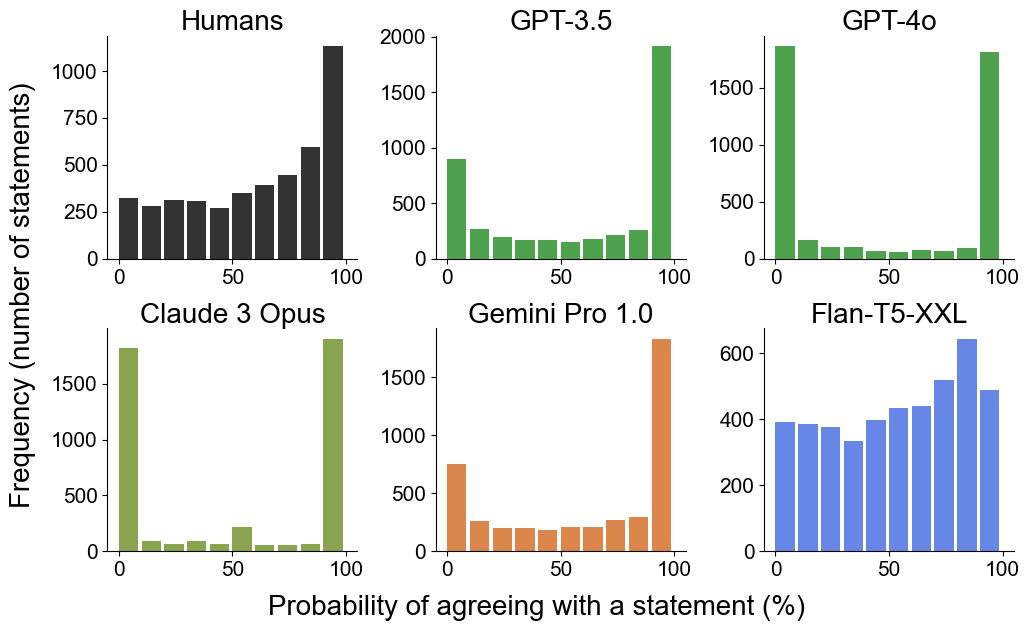

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ax, model_name in zip(
    axes.flatten(),
    ["Human", "GPT-3.5", "GPT-4o", "Claude 3 Opus", "Gemini Pro 1.0", "Flan-T5-XXL"],
):
    if model_name == "Human":
        x = humans_q1_soft["yes"] * 100
        color = "k"
    else:
        x = all_models_q1_probs[model_name]["yes"] * 100
        color = model_to_color[model_name]

    ax.hist(x, bins=np.arange(0, 101, 10), width=8.5, color=color, alpha=0.8)
    sns.despine(ax=ax)
    title = "Humans" if model_name == "Human" else model_name
    ax.set_title(title, size=20, pad=-2)
    ax.tick_params(axis="both", which="major", labelsize=15)

fig.text(
    x=0.5,
    y=0,
    s="Probability of agreeing with a statement (%)",
    size=20,
    ha="center",
    va="top",
)
fig.text(
    x=0,
    y=0.5,
    s="Frequency (number of statements)",
    size=20,
    ha="right",
    va="center",
    rotation=90,
)

fig.tight_layout()

plt.savefig("figures/q1_probs_freq.humnas_models.pdf", bbox_inches="tight")

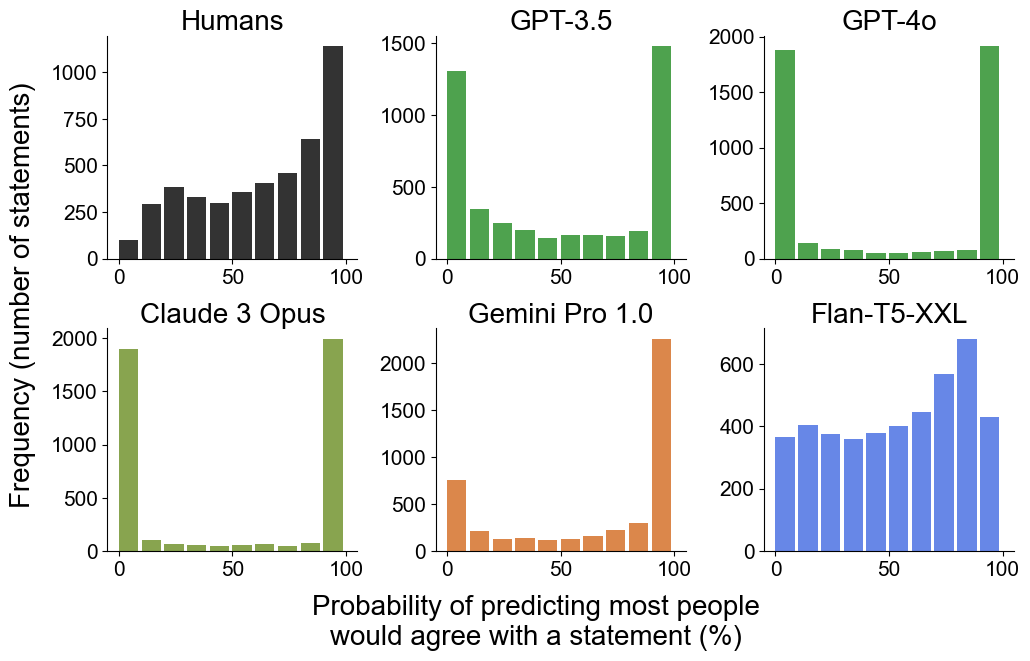

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ax, model_name in zip(
    axes.flatten(),
    ["Human", "GPT-3.5", "GPT-4o", "Claude 3 Opus", "Gemini Pro 1.0", "Flan-T5-XXL"],
):
    if model_name == "Human":
        x = humans_q2_soft["yes"] * 100
        color = "k"
    else:
        x = all_models_q2_probs[model_name]["yes"] * 100
        color = model_to_color[model_name]

    ax.hist(x, bins=np.arange(0, 101, 10), width=8.5, color=color, alpha=0.8)
    sns.despine(ax=ax)
    title = "Humans" if model_name == "Human" else model_name
    ax.set_title(title, size=20, pad=-2)
    ax.tick_params(axis="both", which="major", labelsize=15)

fig.text(
    x=0.5,
    y=0,
    s="Probability of predicting most people\nwould agree with a statement (%)",
    size=20,
    ha="center",
    va="top",
)
fig.text(
    x=0,
    y=0.5,
    s="Frequency (number of statements)",
    size=20,
    ha="right",
    va="center",
    rotation=90,
)

fig.tight_layout()
plt.savefig("figures/q2_probs_freq.humnas_models.pdf", bbox_inches="tight")

In [16]:
from scipy.stats import pearsonr
import matplotlib.patches as mpatches


def plot_ci_vs_confidence(model_name: str, q="q1", ax=None, annot_majority=False):

    if q == "q1":
        y = all_models_q1_probs[model_name]["yes"] * 100
        # x = avg_vote_per_q * 100
    elif q == "q2":
        y = all_models_q2_probs[model_name]["yes"] * 100
        # x = avg_vote_per_q_others * 100

    x = avg_vote_per_q * 100

    # Majority vote of humans on the statement
    x_maj = (x >= 50).astype(int)
    # y_maj = (y >= 50).astype(int)

    # Model probability of the answer chosen by human majority
    # If the majority vote is "yes", then use prob
    # Otherwise, use 100 - prob
    # y[x_maj == 0] = 100 - y[x_maj == 0]

    # split x into 10 bins
    bin_edges = np.linspace(0, 100, 11, endpoint=True)
    x_binned = np.digitize(x, bins=bin_edges, right=True)

    # within each bin, get the mean of y
    y_mean = np.zeros(len(bin_edges) - 1)
    for i in range(len(bin_edges) - 1):
        left, right = bin_edges[i], bin_edges[i + 1]
        if left == 0:
            x_in_bin = x[(x >= left) & (x <= right)]
            y_in_bin = y[(x >= left) & (x <= right)]
        else:
            x_in_bin = x[(x > left) & (x <= right)]
            y_in_bin = y[(x > left) & (x <= right)]

        midpoint = x_in_bin.mean()
        y_in_bin = y[(x >= left) & (x < right)]
        # y_in_bin[y_in_bin < 50] = 100 - y_in_bin[y_in_bin < 50]
        if len(y_in_bin) > 0:
            y_mean[i] = y_in_bin.mean()
            x_binned[x_binned == i + 1] = midpoint
        else:
            x_binned[x_binned == i + 1] = np.nan

        sns.violinplot(
            x=midpoint,
            y=y_in_bin,
            inner="quart",
            color="white",  # model_to_color[model_name],
            alpha=0.6,
            orient="v",
            ax=ax,
            width=6,
            cut=0,
            native_scale=True,
            linecolor="black",
            linewidth=1,
            zorder=1,
            inner_kws={"zorder": 2},
        )
        ax.text(
            x=midpoint,
            y=101,
            s=f"({len(y_in_bin)})",
            ha="center",
            va="bottom",
            fontsize=13,
            alpha=0.8,
        )

        ax.scatter(
            [midpoint],
            [y_mean[i]],
            color=model_to_color[model_name],
            s=150,
            zorder=5,
            edgecolor="black",
        )

    ax.set_xlim(-2, 100)
    ax.set_ylim(-2, 100)
    ax.set_xticks(bin_edges)
    sns.despine(ax=ax)
    ax.tick_params(axis="both", which="major", labelsize=18)

    ax.plot([0, 100], [0, 100], color="gray", linestyle="--", linewidth=1)

    # ax.set_xlabel("Statement consensus according to humans ($c_i$, %)", size=20, labelpad=10)
    # ax.set_ylabel("Probability of highest-ranked\nanswer (agree or disagree, %)", size=20, labelpad=10)

    result = pearsonr(x, y, alternative="two-sided")
    r, p = result.statistic, result.pvalue
    r = f"{r:.2f}"[1:]
    p = f"{p:.2f}"[1:]

    rmse = np.sqrt(np.mean((x - y) ** 2))
    rmse = f"{rmse:.2f}"

    if annot_majority:
        ax.plot([50, 50], [0, 100], color="gray", linestyle="--", linewidth=1)
        # Annotate majority agree/disagree

        arr = mpatches.FancyArrowPatch(
            (50, 10),
            (60, 10),
            arrowstyle="->,head_width=.2",
            mutation_scale=20,
            color="black",
        )
        ax.add_patch(arr)
        ax.annotate(
            f"Majority agree",
            (61, 10),
            ha="left",
            va="center",
            size=16,
            color="black",
            rotation=0,
        )

        arr = mpatches.FancyArrowPatch(
            (50, 90),
            (40, 90),
            arrowstyle="->,head_width=.2",
            mutation_scale=20,
            color="black",
        )
        ax.add_patch(arr)
        ax.annotate(
            f"Majority disagree",
            (39, 90),
            ha="right",
            va="center",
            size=16,
            color="black",
            rotation=0,
        )

    # # these are matplotlib.patch.Patch properties
    # props = dict(boxstyle='Round', facecolor='white', alpha=1, pad=0.5)

    # # place a text box in upper left in axes coords
    # textstr = f"$r = {r:.2f}$\n$p = {p:.2f}$"
    # ax.text(0.83, 0.1, textstr, transform=ax.transAxes, fontsize=16,
    #         verticalalignment='top', bbox=props, ha="left", va="center")

    ax.set_title(model_name + f": $r = ${r}, RMSE = {rmse}", size=22, pad=25)

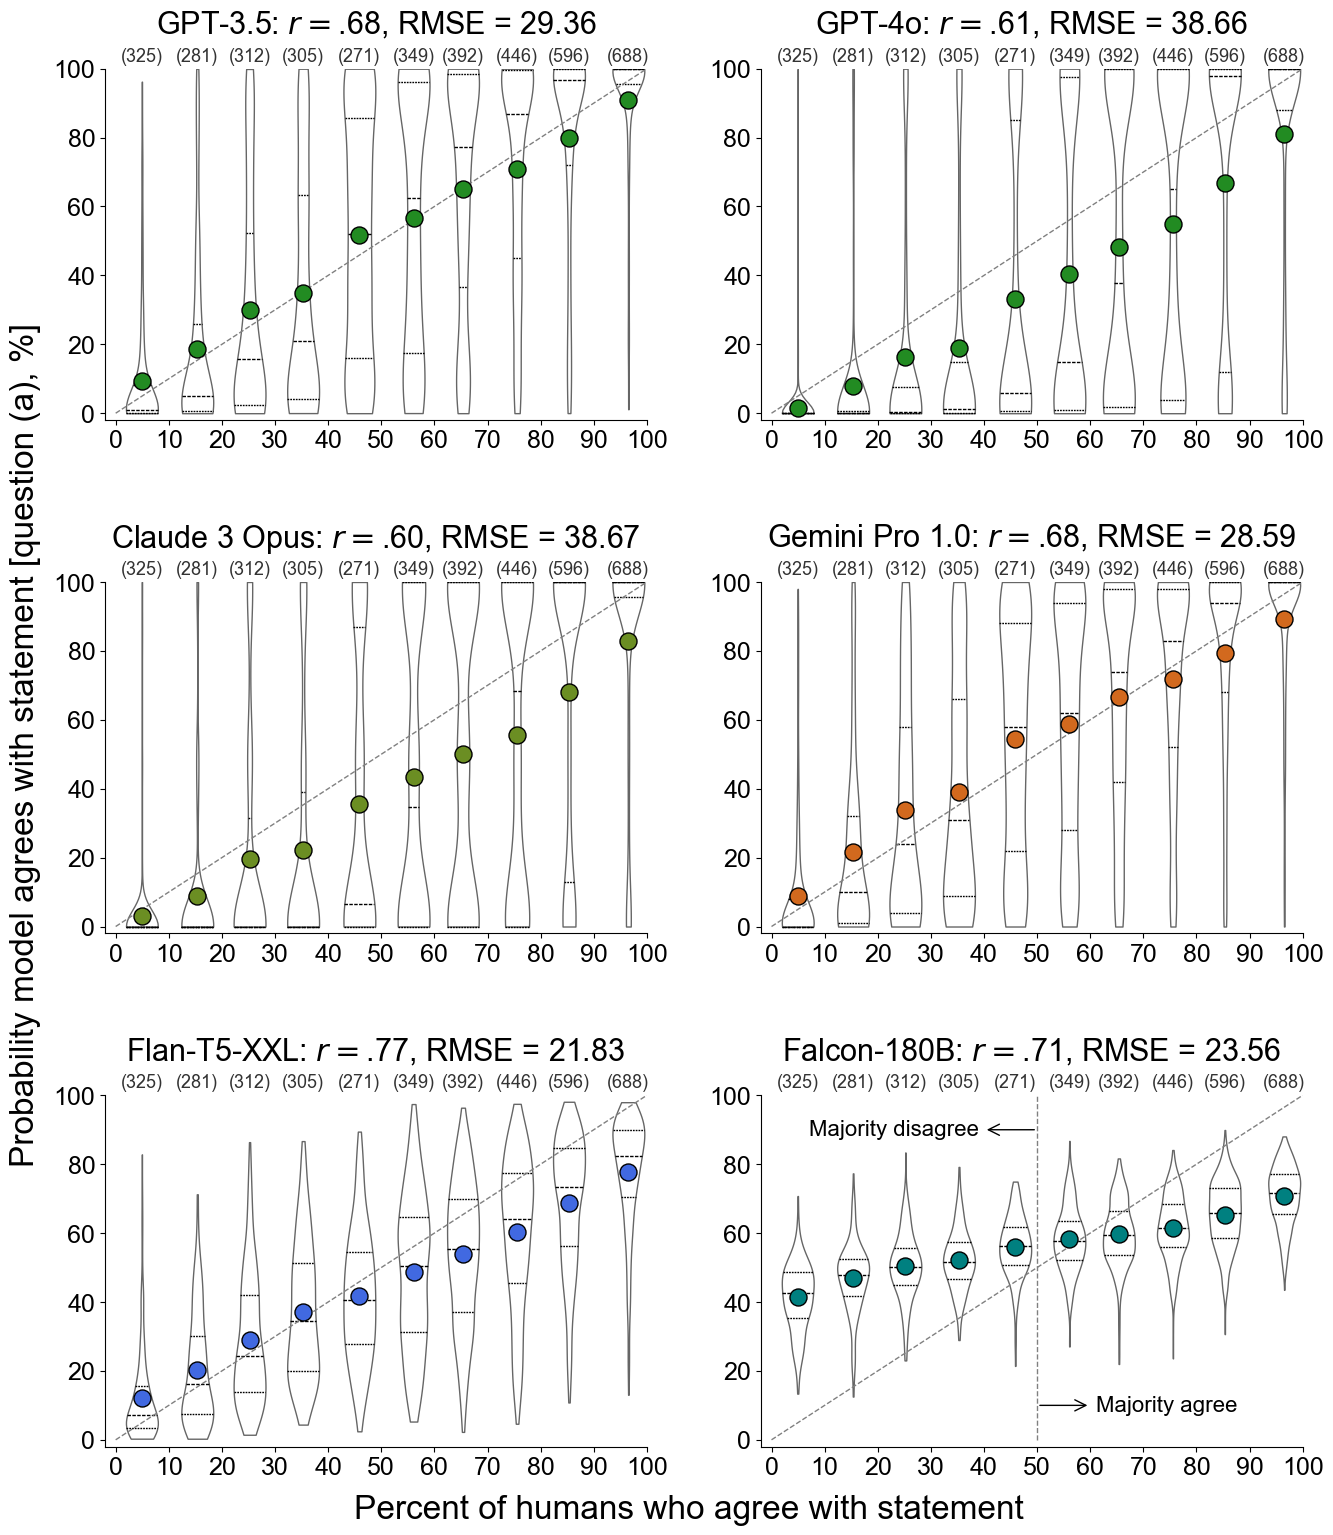

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(13, 15), sharex=False, sharey=False)
for ax, model_name in zip(
    axes.flatten(),
    [
        "GPT-3.5",
        "GPT-4o",
        "Claude 3 Opus",
        "Gemini Pro 1.0",
        "Flan-T5-XXL",
        "Falcon-180B",
    ],
):
    plot_ci_vs_confidence(
        model_name, q="q1", ax=ax, annot_majority=(model_name == "Falcon-180B")
    )
    ax.set_ylabel(None)

ax = axes.flatten()[0]

fig.tight_layout(w_pad=3, h_pad=5)
fig.text(
    x=0.5,
    y=-0.01,
    s="Percent of humans who agree with statement",
    size=24,
    ha="center",
    va="center",
)
fig.text(
    x=-0.01,
    y=0.5,
    s="Probability model agrees with statement [question (a), %]",
    size=24,
    ha="center",
    va="center",
    rotation=90,
)
plt.savefig("figures/ci_vs_confidence.models_q1.pdf", bbox_inches="tight")

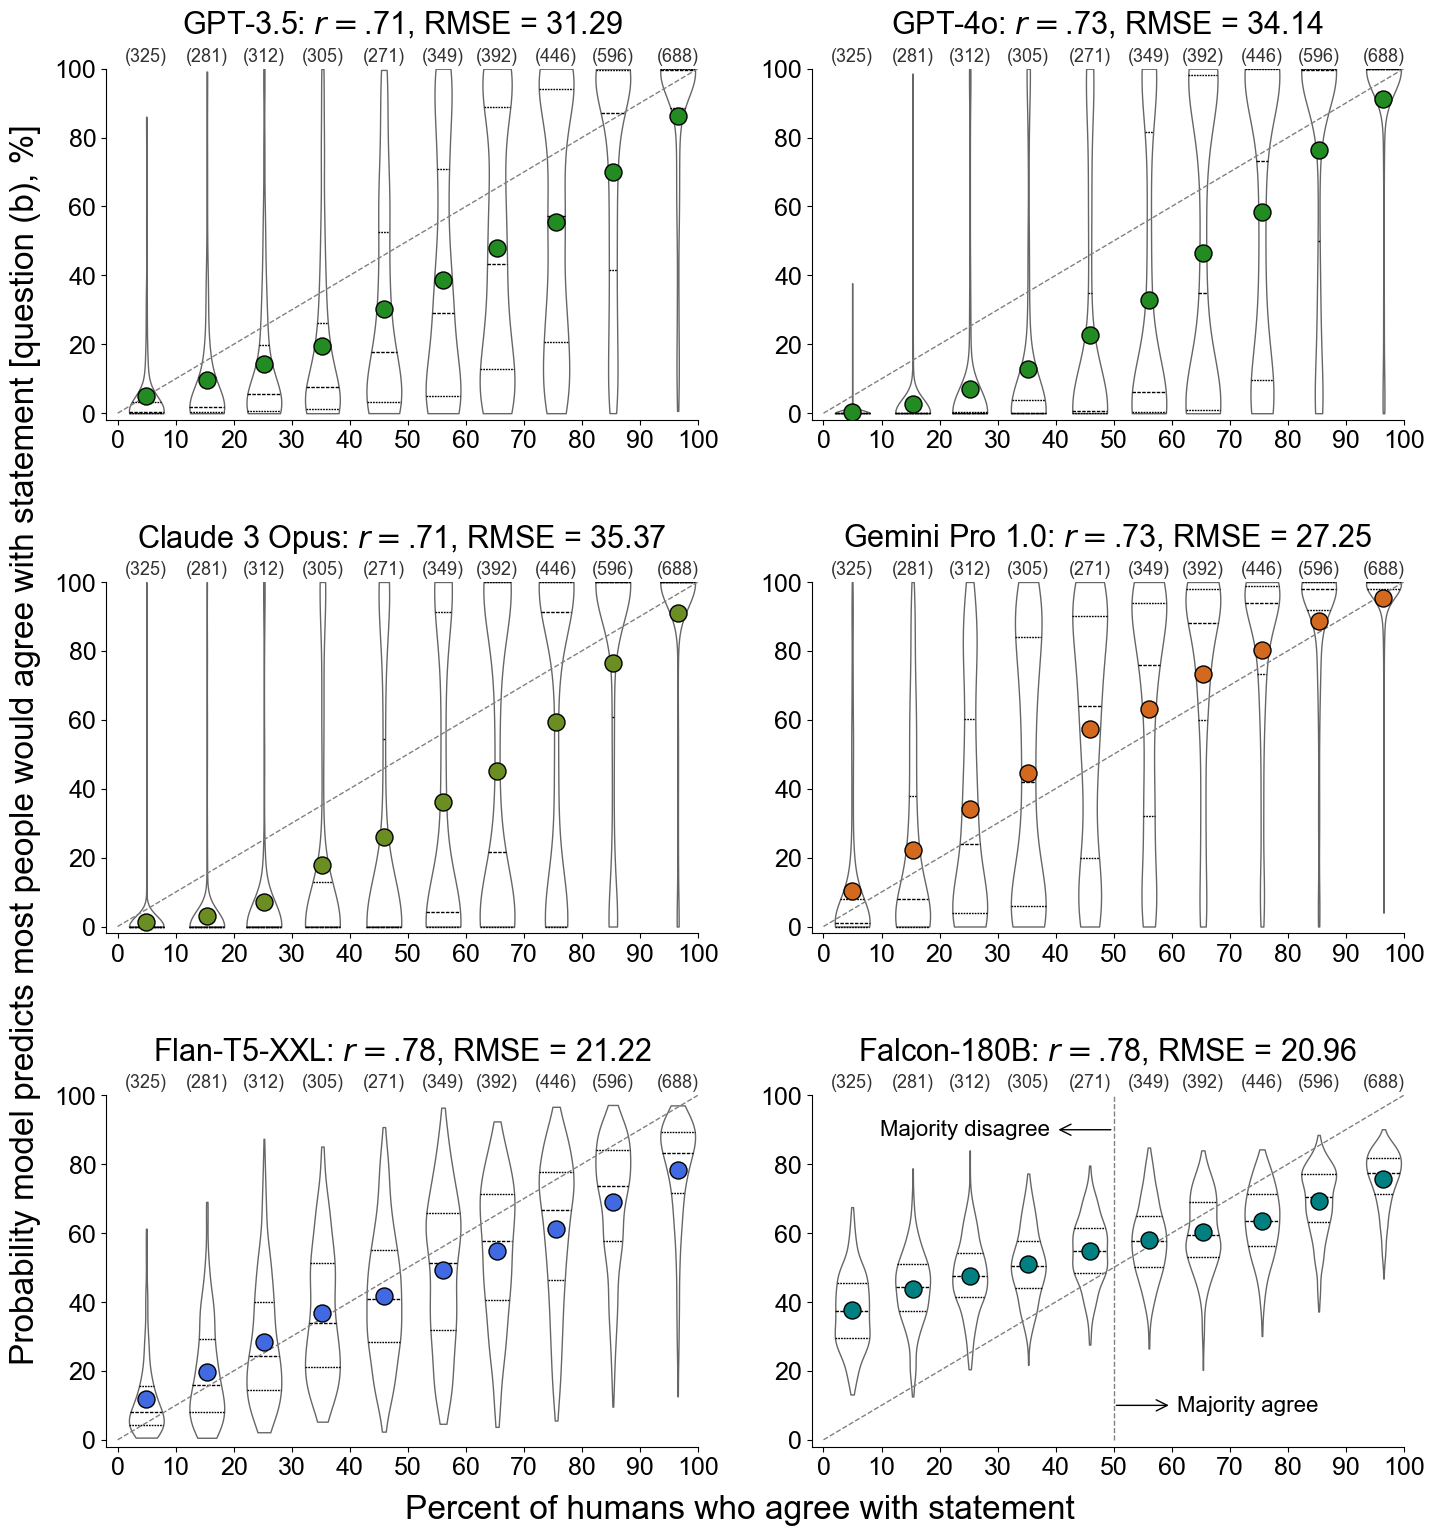

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15), sharex=False, sharey=False)
for ax, model_name in zip(
    axes.flatten(),
    [
        "GPT-3.5",
        "GPT-4o",
        "Claude 3 Opus",
        "Gemini Pro 1.0",
        "Flan-T5-XXL",
        "Falcon-180B",
    ],
):
    plot_ci_vs_confidence(
        model_name, q="q2", ax=ax, annot_majority=(model_name == "Falcon-180B")
    )
    ax.set_ylabel(None)

fig.tight_layout(w_pad=3, h_pad=5)
fig.text(
    x=0.5,
    y=-0.01,
    s="Percent of humans who agree with statement",
    size=24,
    ha="center",
    va="center",
)
fig.text(
    x=-0.01,
    y=0.5,
    s="Probability model predicts most people would agree with statement [question (b), %]",
    size=24,
    ha="center",
    va="center",
    rotation=90,
)
plt.savefig("figures/ci_vs_confidence.models_q2.pdf", bbox_inches="tight")

### Calculate Individual-Level Commonsensicality of Models


In [19]:
def get_binary_answers(q_answers):
    assert q_answers.columns[0].lower() == "yes"
    assert q_answers.columns[1].lower() == "no"
    if len(q_answers.columns) > 2:
        assert q_answers.columns[2].lower() == "other"

    # Remove the "other" answer and rescale so "yes" + "no" = 1
    q_answers = q_answers.to_numpy()
    other = q_answers[:, 2]
    q_answers[:, 0] += other / 2
    q_answers[:, 1] += other / 2
    q_answers = q_answers[:, 0:2]
    q_answers /= q_answers.sum(1, keepdims=True)

    # Get the answer with the highest probability
    q_answers = q_answers.argmax(axis=1)

    # Revert the ordering so that No = 0, Yes = 1
    # (Previously, no = 1, yes = 0)
    q_answers = 1 - q_answers

    return q_answers

#### When models disagree on question 1 and question 2


In [20]:
# When does a model give the same answer for q1 and q2?
from sklearn.metrics import accuracy_score

q1_q2_same = pd.Series(0.0, index=model_to_color.keys())

for model_name in q1_q2_same.index:
    q1_q2_same[model_name] = accuracy_score(
        get_binary_answers(all_models[model_name]["q1"]),
        get_binary_answers(all_models[model_name]["q2"]),
    )

q1_q2_same.std()

np.float64(0.04203387821386855)

In [21]:
maj_i

0       1
1       1
2       1
3       1
4       1
       ..
4402    1
4403    1
4404    1
4405    1
4406    0
Length: 4407, dtype: int64

In [22]:
q1_q2_same_all = pd.DataFrame(
    0, dtype=int, index=statements.index, columns=["Humans", *model_to_color.keys()]
)
q1_q2_same_all["Humans"] = (maj_i == maj_others).astype(int)

for model_name in model_to_color.keys():
    q1_q2_same_all[model_name] = (
        get_binary_answers(all_models[model_name]["q1"])
        == get_binary_answers(all_models[model_name]["q2"])
    ).astype(int)

q1_q2_same_all

q1_q2_diff = 1 - q1_q2_same_all
q1_q2_diff = q1_q2_diff.iloc[:, 1:]  # remove humans column
q1_q2_diff

,GPT-3.5,GPT-4-0125,GPT-4-0409,GPT-4o,GPT-5,LLaMA-2-7B,LLaMA-2-13B,LLaMA-2-70B,LLaMA-3-8B,LLaMA-3-70B,...,Falcon-180B,Claude 3 Haiku,Claude 3 Sonnet,Claude 3 Opus,DBRX,Qwen2-0.5B,Qwen2-1.5B,Qwen2-7B,Qwen2-57B,Qwen2-72B
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4404,1,1,0,1,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,1,0
4405,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# diff_total_statement = pd.DataFrame(q1_q2_diff.sum(1), columns=["sum"])
# num_models = q1_q2_diff.shape[1]

# for i in q1_q2_diff.mean(1).sort_values(ascending=False).index[:24]:
#     print(
#         f"ID: {i:4d}, Rate: {diff_total_statement.loc[i, 'sum'] * 100 / 35:.2f}% ({diff_total_statement.loc[i, 'sum']:2d}/{num_models}), Statement: {statements.loc[i, 'statement']}")

In [24]:
# diff_total_statement["Statement"] = statements.loc[q1_q2_diff.index, "statement"]
# diff_total_statement["Source"] = statements.loc[q1_q2_diff.index, "elicitation"]
# diff_total_statement["Number (\\%) of models"] = diff_total_statement["sum"].map(
#     lambda x: f"{x} / {num_models} ({x * 100 / num_models:.1f}\\%)")

In [25]:
# diff_total_statement.sort_values("sum", ascending=False).drop(columns=["sum"])

In [26]:
# all_models_q1_probs["GPT-4o"].loc[2753]

In [27]:
# print(diff_total_statement.sort_values("sum", ascending=False).drop(
#     columns=["sum"]).iloc[:25, :][["Source", "Statement", "Number (\\%) of models"]].to_latex(index=False))

#### Commonsensicality


In [28]:
from sklearn.metrics import accuracy_score


def compute_commonsensicality(answers, binary=False, return_ca=False):
    q1_answers = answers["q1"]
    if not binary:
        q1_answers = get_binary_answers(q1_answers)

    q2_answers = answers["q2"]
    if not binary:
        q2_answers = get_binary_answers(q2_answers)

    consensus = accuracy_score(y_true=maj_i, y_pred=q1_answers)
    awareness = accuracy_score(y_true=maj_i, y_pred=q2_answers)

    commonsensicality = np.sqrt(consensus * awareness)

    if return_ca:
        return consensus, awareness, commonsensicality

    return commonsensicality

In [29]:
# Commonsensicality for all models
all_model_comm = {}
all_model_cons = {}
all_model_awar = {}
for model_name, model_answers in all_models.items():
    con, awe, com = compute_commonsensicality(model_answers, return_ca=True)
    all_model_comm[model_name] = com
    all_model_awar[model_name] = awe
    all_model_cons[model_name] = con

In [30]:
all_model_comm_pd = pd.Series(all_model_comm)
all_model_comm_pd.sort_values(ascending=False)

Mixtral-8x22B      0.823416
Mistral-Large      0.812750
Qwen2-72B          0.811413
Qwen2-57B          0.809153
GPT-4-0409         0.805780
Mistral-7B         0.804397
Flan-T5-XXL        0.804046
Qwen2-7B           0.803691
Falcon-180B        0.799179
Gemini Pro 1.0     0.797248
GPT-4-0125         0.784279
Flan-T5-Large      0.768995
GPT-3.5            0.768421
Mixtral-8x7B       0.763886
DBRX               0.762877
GPT-5              0.756795
Claude 3 Opus      0.753990
GPT-4o             0.751618
Falcon-40B         0.750548
LLaMA-2-7B         0.749877
Qwen2-1.5B         0.745926
LLaMA-3-70B        0.743530
Flan-T5-XL         0.729969
OLMo-7B            0.726615
Gemma-7B           0.720467
Qwen2-0.5B         0.667794
Falcon-7B          0.663373
Gemma-2B           0.658804
LLaMA-2-70B        0.635449
LLaMA-3-8B         0.616844
Claude 3 Sonnet    0.615466
Claude 3 Haiku     0.614012
Flan-T5-Base       0.581310
LLaMA-2-13B        0.464967
Flan-T5-Small      0.341722
dtype: float64

In [31]:
all_con_awe_com = pd.DataFrame(
    0.0,
    columns=["consensus", "awareness", "commonsensicality"],
    index=all_model_comm.keys(),
)
for model_name in all_con_awe_com.index:
    all_con_awe_com.loc[model_name, "consensus"] = all_model_cons[model_name]
    all_con_awe_com.loc[model_name, "awareness"] = all_model_awar[model_name]
    all_con_awe_com.loc[model_name, "commonsensicality"] = all_model_comm[model_name]
all_con_awe_com

,consensus,awareness,commonsensicality
GPT-3.5,0.782619,0.754482,0.768421
GPT-4-0125,0.776265,0.792376,0.784279
GPT-4-0409,0.779669,0.832766,0.805780
GPT-4o,0.725210,0.778988,0.751618
GPT-5,0.719310,0.796233,0.756795
LLaMA-2-7B,0.739959,0.759927,0.749877
LLaMA-2-13B,0.485364,0.445428,0.464967
LLaMA-2-70B,0.657136,0.614477,0.635449
LLaMA-3-8B,0.572498,0.664624,0.616844
LLaMA-3-70B,0.719537,0.768323,0.743530


In [32]:
# print((all_con_awe_com * 100)\
#       .sort_index()\
#       .map(lambda x: str(int(x)) if abs(x - int(x)) < 1e-6 else str(round(x,1)))\
#       .to_latex()
#      )

### Plot Consensus, Awareness and Commonsensicality of Models


#### Consensus


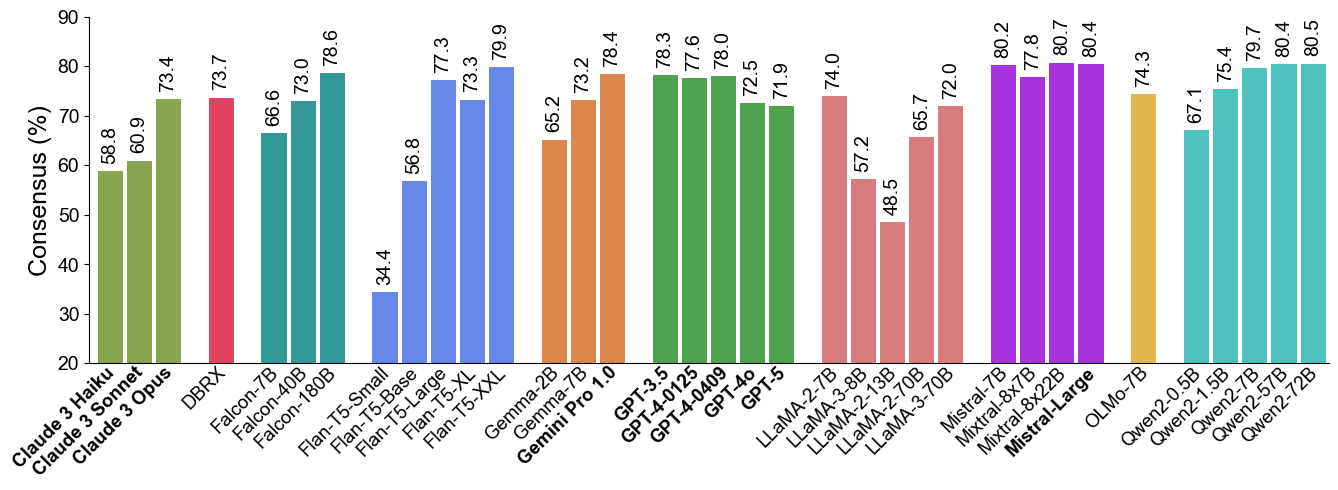

In [33]:
s = all_con_awe_com["consensus"] * 100


def ax_barh(ax, model_names, color, yticks_val, yticks):
    c = s.loc[model_names]
    max_yticksval = max(yticks_val) if len(yticks_val) > 0 else 0

    yvals = np.array(
        list(np.arange(max_yticksval + 1, max_yticksval + len(c) * 1.01 + 1, 1.1))
    )

    xvals = c.values
    for x, height, model_name in zip(yvals, xvals, model_names):
        ax.bar(x=[x], height=[height], color=color, width=0.95, alpha=0.8)
        i = x
        ax.text(
            s=f"{round(height, 1)}",
            y=height + 1.5,
            x=i,
            va="bottom",
            ha="center",
            size=14,
            rotation=90,
            fontweight=None,
        )

    yticks_val.extend(yvals)
    yticks.extend(c.index)
    yticks_val.append(max(yticks_val) + 1)
    yticks.append("")


fig, ax = plt.subplots(1, 1, figsize=(16, 4.5))

yticks_val = []
yticks = []

ax_barh(
    ax=ax,
    model_names=["Claude 3 Haiku", "Claude 3 Sonnet", "Claude 3 Opus"],
    color="olivedrab",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax, model_names=["DBRX"], color="crimson", yticks_val=yticks_val, yticks=yticks
)

ax_barh(
    ax=ax,
    model_names=["Falcon-7B", "Falcon-40B", "Falcon-180B"],
    color="teal",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=[
        "Flan-T5-Small",
        "Flan-T5-Base",
        "Flan-T5-Large",
        "Flan-T5-XL",
        "Flan-T5-XXL",
    ],
    color="royalblue",
    yticks_val=yticks_val,
    yticks=yticks,
)


ax_barh(
    ax=ax,
    model_names=["Gemma-2B", "Gemma-7B", "Gemini Pro 1.0"],
    color="chocolate",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["GPT-3.5", "GPT-4-0125", "GPT-4-0409", "GPT-4o", "GPT-5"],
    color="forestgreen",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=[
        "LLaMA-2-7B",
        "LLaMA-3-8B",
        "LLaMA-2-13B",
        "LLaMA-2-70B",
        "LLaMA-3-70B",
    ],
    color="indianred",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["Mistral-7B", "Mixtral-8x7B", "Mixtral-8x22B", "Mistral-Large"],
    color="darkviolet",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["OLMo-7B"],
    color="goldenrod",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["Qwen2-0.5B", "Qwen2-1.5B", "Qwen2-7B", "Qwen2-57B", "Qwen2-72B"],
    color="lightseagreen",
    yticks_val=yticks_val,
    yticks=yticks,
)

sns.despine(ax=ax)
ax.set_ylabel("Consensus (%)", size=18)
ax.set_ylim([20, 90])

ax.set_xlim([0.2, max(yticks_val) - 0.4])

# yticks = np.arange(20, 90, 10)
ax.set_yticks(np.arange(20, 91, 10), [f"{x}" for x in np.arange(20, 91, 10)], size=14)
for val, model_name in zip(np.array(yticks_val) + 0.3, yticks):

    if model_name in [
        "GPT-5",
        "GPT-4-0409",
        "GPT-4-0125",
        "GPT-4o",
        "GPT-3.5",
        "Claude 3 Haiku",
        "Claude 3 Sonnet",
        "Claude 3 Opus",
        "Mistral-Large",
        "Gemini Pro 1.0",
    ]:
        bold = True
    else:
        bold = False

    ax.text(
        x=val,
        y=20,
        s=model_name,
        va="top",
        ha="right",
        rotation=45,
        fontweight="bold" if bold else None,
        size=13.5,
    )

ax.set_xticks([])

plt.savefig("figures/si_model_consensus_ranking_by_family.pdf", bbox_inches="tight")

plt.show()

#### Awareness


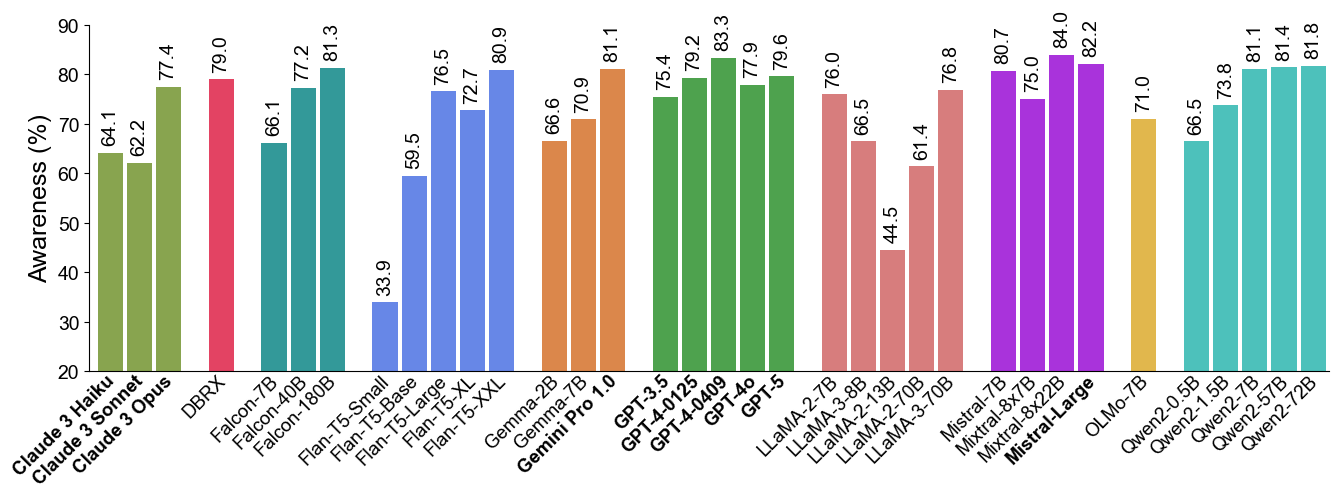

In [34]:
s = all_con_awe_com["awareness"] * 100


def ax_barh(ax, model_names, color, yticks_val, yticks):
    c = s.loc[model_names]
    max_yticksval = max(yticks_val) if len(yticks_val) > 0 else 0

    yvals = np.array(
        list(np.arange(max_yticksval + 1, max_yticksval + len(c) * 1.01 + 1, 1.1))
    )

    xvals = c.values
    for x, height, model_name in zip(yvals, xvals, model_names):
        ax.bar(x=[x], height=[height], color=color, width=0.95, alpha=0.8)
        i = x
        ax.text(
            s=f"{round(height, 1)}",
            y=height + 1.5,
            x=i,
            va="bottom",
            ha="center",
            size=14,
            rotation=90,
            fontweight=None,
        )

    yticks_val.extend(yvals)
    yticks.extend(c.index)
    yticks_val.append(max(yticks_val) + 1)
    yticks.append("")


fig, ax = plt.subplots(1, 1, figsize=(16, 4.5))

yticks_val = []
yticks = []

ax_barh(
    ax=ax,
    model_names=["Claude 3 Haiku", "Claude 3 Sonnet", "Claude 3 Opus"],
    color="olivedrab",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax, model_names=["DBRX"], color="crimson", yticks_val=yticks_val, yticks=yticks
)

ax_barh(
    ax=ax,
    model_names=["Falcon-7B", "Falcon-40B", "Falcon-180B"],
    color="teal",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=[
        "Flan-T5-Small",
        "Flan-T5-Base",
        "Flan-T5-Large",
        "Flan-T5-XL",
        "Flan-T5-XXL",
    ],
    color="royalblue",
    yticks_val=yticks_val,
    yticks=yticks,
)


ax_barh(
    ax=ax,
    model_names=["Gemma-2B", "Gemma-7B", "Gemini Pro 1.0"],
    color="chocolate",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["GPT-3.5", "GPT-4-0125", "GPT-4-0409", "GPT-4o", "GPT-5"],
    color="forestgreen",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=[
        "LLaMA-2-7B",
        "LLaMA-3-8B",
        "LLaMA-2-13B",
        "LLaMA-2-70B",
        "LLaMA-3-70B",
    ],
    color="indianred",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["Mistral-7B", "Mixtral-8x7B", "Mixtral-8x22B", "Mistral-Large"],
    color="darkviolet",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["OLMo-7B"],
    color="goldenrod",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["Qwen2-0.5B", "Qwen2-1.5B", "Qwen2-7B", "Qwen2-57B", "Qwen2-72B"],
    color="lightseagreen",
    yticks_val=yticks_val,
    yticks=yticks,
)

sns.despine(ax=ax)
ax.set_ylabel("Awareness (%)", size=18)
ax.set_ylim([20, 90])

ax.set_xlim([0.2, max(yticks_val) - 0.4])

# yticks = np.arange(20, 90, 10)
ax.set_yticks(np.arange(20, 91, 10), [f"{x}" for x in np.arange(20, 91, 10)], size=14)
for val, model_name in zip(np.array(yticks_val) + 0.3, yticks):

    if model_name in [
        "GPT-5",
        "GPT-4-0409",
        "GPT-4-0125",
        "GPT-4o",
        "GPT-3.5",
        "Claude 3 Haiku",
        "Claude 3 Sonnet",
        "Claude 3 Opus",
        "Mistral-Large",
        "Gemini Pro 1.0",
    ]:
        bold = True
    else:
        bold = False

    ax.text(
        x=val,
        y=20,
        s=model_name,
        va="top",
        ha="right",
        rotation=45,
        fontweight="bold" if bold else None,
        size=13.5,
    )

ax.set_xticks([])

plt.savefig("figures/si_model_awareness_ranking_by_family.pdf", bbox_inches="tight")

plt.show()

#### Commonsensicality


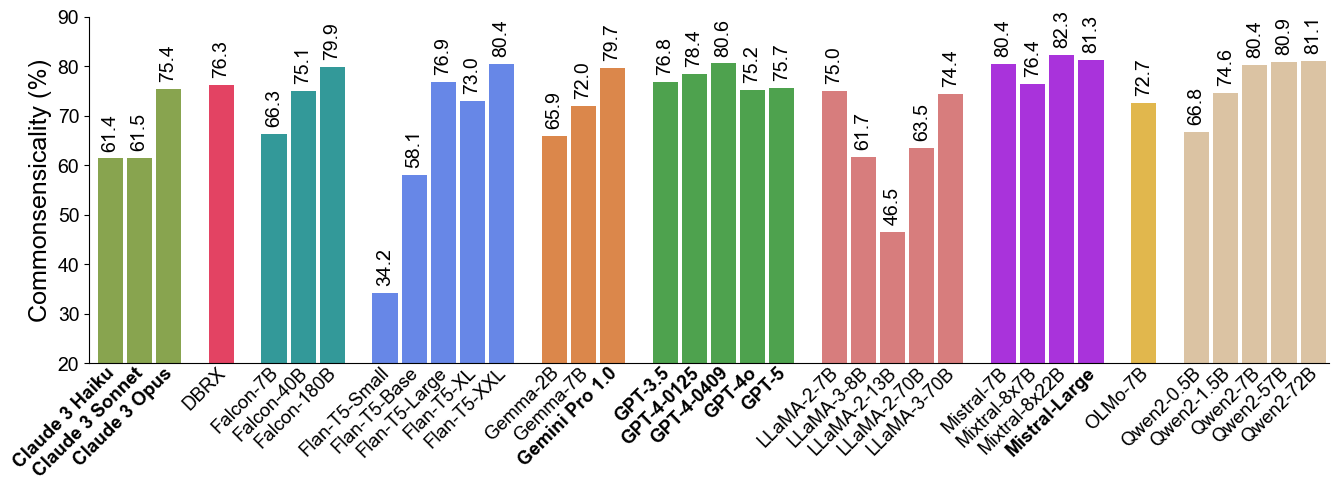

In [35]:
s = all_con_awe_com["commonsensicality"] * 100


def ax_barh(ax, model_names, color, yticks_val, yticks):
    c = s.loc[model_names]
    max_yticksval = max(yticks_val) if len(yticks_val) > 0 else 0

    yvals = np.array(
        list(np.arange(max_yticksval + 1, max_yticksval + len(c) * 1.01 + 1, 1.1))
    )

    xvals = c.values
    for x, height, model_name in zip(yvals, xvals, model_names):
        ax.bar(x=[x], height=[height], color=color, width=0.95, alpha=0.8)
        i = x
        ax.text(
            s=f"{round(height, 1)}",
            y=height + 1.5,
            x=i,
            va="bottom",
            ha="center",
            size=14,
            rotation=90,
            fontweight=None,
        )

    yticks_val.extend(yvals)
    yticks.extend(c.index)
    yticks_val.append(max(yticks_val) + 1)
    yticks.append("")


fig, ax = plt.subplots(1, 1, figsize=(16, 4.5))

yticks_val = []
yticks = []

ax_barh(
    ax=ax,
    model_names=["Claude 3 Haiku", "Claude 3 Sonnet", "Claude 3 Opus"],
    color="olivedrab",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax, model_names=["DBRX"], color="crimson", yticks_val=yticks_val, yticks=yticks
)

ax_barh(
    ax=ax,
    model_names=["Falcon-7B", "Falcon-40B", "Falcon-180B"],
    color="teal",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=[
        "Flan-T5-Small",
        "Flan-T5-Base",
        "Flan-T5-Large",
        "Flan-T5-XL",
        "Flan-T5-XXL",
    ],  # "Flan-UL2"],
    color="royalblue",
    yticks_val=yticks_val,
    yticks=yticks,
)


ax_barh(
    ax=ax,
    model_names=["Gemma-2B", "Gemma-7B", "Gemini Pro 1.0"],
    color="chocolate",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["GPT-3.5", "GPT-4-0125", "GPT-4-0409", "GPT-4o", "GPT-5"],
    color="forestgreen",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=[
        "LLaMA-2-7B",
        "LLaMA-3-8B",
        "LLaMA-2-13B",
        "LLaMA-2-70B",
        "LLaMA-3-70B",
    ],
    color="indianred",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["Mistral-7B", "Mixtral-8x7B", "Mixtral-8x22B", "Mistral-Large"],
    color="darkviolet",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["OLMo-7B"],
    color="goldenrod",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_barh(
    ax=ax,
    model_names=["Qwen2-0.5B", "Qwen2-1.5B", "Qwen2-7B", "Qwen2-57B", "Qwen2-72B"],
    color="tan",
    yticks_val=yticks_val,
    yticks=yticks,
)

sns.despine(ax=ax)
ax.set_ylabel("Commonsensicality (%)", size=18)
ax.set_ylim([20, 90])

ax.set_xlim([0.2, max(yticks_val) - 0.4])

# yticks = np.arange(20, 90, 10)
ax.set_yticks(np.arange(20, 91, 10), [f"{x}" for x in np.arange(20, 91, 10)], size=14)
for val, model_name in zip(np.array(yticks_val) + 0.3, yticks):

    if model_name in [
        "GPT-5",
        "GPT-4-0409",
        "GPT-4-0125",
        "GPT-4o",
        "GPT-3.5",
        "Claude 3 Haiku",
        "Claude 3 Sonnet",
        "Claude 3 Opus",
        "Mistral-Large",
        "Gemini Pro 1.0",
    ]:
        bold = True
    else:
        bold = False

    ax.text(
        x=val,
        y=20,
        s=model_name,
        va="top",
        ha="right",
        rotation=45,
        fontweight="bold" if bold else None,
        size=13.5,
    )

ax.set_xticks([])

plt.savefig(
    "figures/si_model_commonsensicality_ranking_by_family.pdf", bbox_inches="tight"
)

plt.show()

#### Rank all models based on commonsensicality


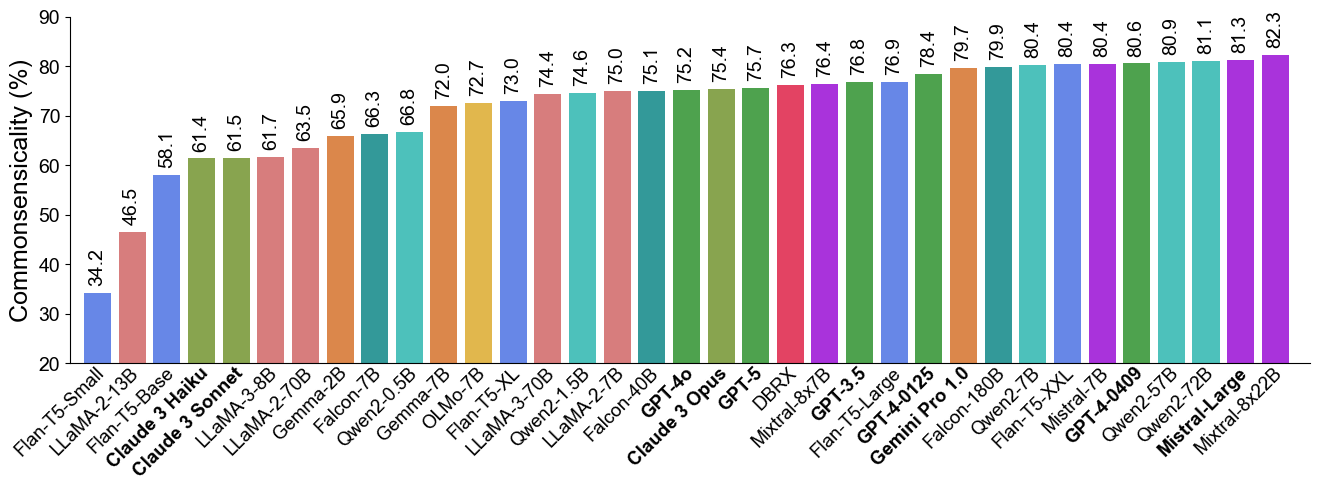

In [36]:
s = all_con_awe_com["commonsensicality"] * 100


def ax_barh(ax, model_names, color, yticks_val, yticks):
    c = s.loc[model_names]
    max_yticksval = max(yticks_val) if len(yticks_val) > 0 else 0

    yvals = np.array(list(np.arange(max_yticksval + 1, max_yticksval + len(c) + 1, 1)))

    xvals = c.values
    for x, height, model_name in zip(yvals, xvals, model_names):
        ax.bar(x=[x], height=[height], color=color, width=0.78, alpha=0.8)
        i = x
        ax.text(
            s=f"{round(height, 1)}",
            y=height + 1.5,
            x=i,
            va="bottom",
            ha="center",
            size=14,
            rotation=90,
            fontweight=None,
        )

    yticks_val.extend(yvals)
    yticks.extend(c.index)


#     yticks_val.append(max(yticks_val) + 1)
#     yticks.append("")


fig, ax = plt.subplots(1, 1, figsize=(16, 4.5))

yticks_val = []
yticks = []

model_order = s.sort_values(ascending=True).index
for model_name in model_order:
    ax_barh(
        ax=ax,
        model_names=[model_name],
        color=model_to_color[model_name],
        yticks_val=yticks_val,
        yticks=yticks,
    )

sns.despine(ax=ax)
ax.set_ylabel("Commonsensicality (%)", size=18)
ax.set_ylim([20, 90])

ax.set_xlim([0.2, max(yticks_val) + 1])

# yticks = np.arange(20, 90, 10)
ax.set_yticks(np.arange(20, 91, 10), [f"{x}" for x in np.arange(20, 91, 10)], size=14)
for val, model_name in zip(np.array(yticks_val) + 0.3, yticks):

    if model_name in [
        "GPT-5",
        "GPT-4-0409",
        "GPT-4-0125",
        "GPT-4o",
        "GPT-3.5",
        "Claude 3 Haiku",
        "Claude 3 Sonnet",
        "Claude 3 Opus",
        "Mistral-Large",
        "Gemini Pro 1.0",
    ]:
        bold = True
    else:
        bold = False

    ax.text(
        x=val,
        y=20,
        s=model_name,
        va="top",
        ha="right",
        rotation=45,
        fontweight="bold" if bold else None,
        size=13.5,
    )

ax.set_xticks([])

plt.savefig(
    "figures/si_model_commonsensicality_ranking_by_score.pdf", bbox_inches="tight"
)

plt.show()

#### All three scores in the same plot


Locator attempting to generate 1001 ticks ([0.0, ..., 100.0]), which exceeds Locator.MAXTICKS (1000).


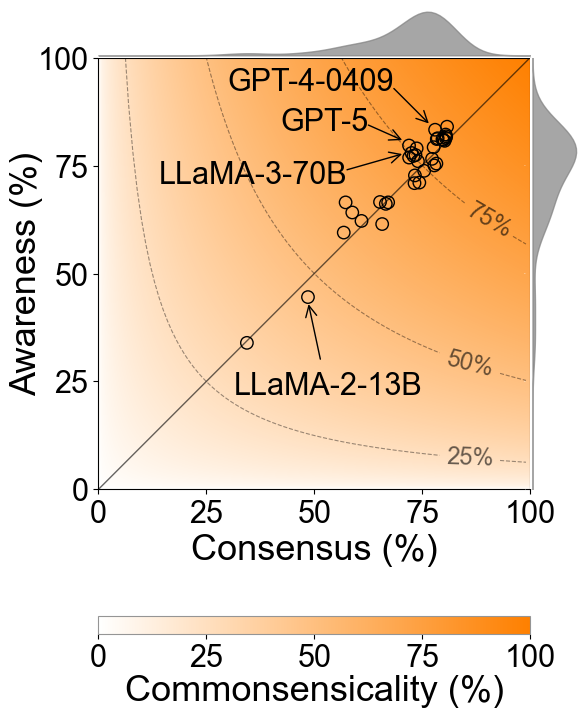

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(
    2,
    2,
    width_ratios=(9, 1),
    height_ratios=(1, 9),
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.0,
    hspace=0.0,
)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(1, 255 / 256, N)
vals[:, 1] = np.linspace(1, 128 / 256, N)
vals[:, 2] = np.linspace(1, 0 / 256, N)
newcmp = ListedColormap(vals)

x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
x_1, y_1 = np.meshgrid(x, y)

comm = np.sqrt(x_1 * y_1)
cax = plt.contourf(x_1, y_1, comm, levels=1000, cmap=newcmp, alpha=1)

cbaxes = fig.add_axes([0.1, -0.14, 0.72, 0.03])
cbar = plt.colorbar(
    cax,
    cax=cbaxes,
    ticks=[0, 25, 50, 75, 100],
    orientation="horizontal",
    pad=0,
    aspect=100,
    fraction=0.1,
)
cbar.ax.set_xticklabels(["0", "25", "50", "75", "100"], size=22)
cbar.ax.set_xlabel("Commonsensicality (%)", size=26, labelpad=2)
cbar.outline.set_edgecolor(np.array((150, 150, 150)) / 256)

# cbaxes = fig.add_axes([0.1, 0.83, 0.655, 0.03])
# cb = plt.colorbar(hb, cax=cbaxes, ticks=[1, 10, 100, 200], orientation="horizontal",
#                    pad=0, aspect=100, fraction=0.1)

ax.scatter(
    x=all_con_awe_com["consensus"] * 100,
    y=all_con_awe_com["awareness"] * 100,
    facecolor="none",
    edgecolor="black",
    s=80,
)
ax.set_ylim([0, 100])
ax.set_xlim([0, 100])
ax.plot([0, 100], [0, 100], color="black", alpha=0.6, linestyle="-", linewidth=1)

# sns.despine(ax=ax)
ax.set_xlabel("Consensus (%)", size=26)
ax.set_ylabel("Awareness (%)", size=26, labelpad=-4)

ax.set_xticks(
    np.arange(0, 101, 25), map(lambda x: str(int(x)), np.arange(0, 101, 25)), size=22
)
ax.set_yticks(
    np.arange(0, 101, 25), map(lambda x: str(int(x)), np.arange(0, 101, 25)), size=22
)

y = all_con_awe_com.loc["GPT-4-0409", "awareness"] * 100
x = all_con_awe_com.loc["GPT-4-0409", "consensus"] * 100
arr = mpatches.FancyArrowPatch(
    (x - 10, y + 10),
    (x - 1, y + 1),
    arrowstyle="->,head_width=.2",
    mutation_scale=20,
    color="black",
)
ax.add_patch(arr)
ax.annotate(
    f"GPT-4-0409",
    (0, 1.2),
    xycoords=arr,
    ha="right",
    va="center",
    size=22,
    color="black",
)

y = all_con_awe_com.loc["GPT-5", "awareness"] * 100
x = all_con_awe_com.loc["GPT-5", "consensus"] * 100
arr = mpatches.FancyArrowPatch(
    (x - 10, y + 5),
    (x - 1, y + 1),
    arrowstyle="->,head_width=.2",
    mutation_scale=20,
    color="black",
)
ax.add_patch(arr)
ax.annotate(
    f"GPT-5", (0, 1.2), xycoords=arr, ha="right", va="center", size=22, color="black"
)

y = all_con_awe_com.loc["LLaMA-3-70B", "awareness"] * 100
x = all_con_awe_com.loc["LLaMA-3-70B", "consensus"] * 100
arr = mpatches.FancyArrowPatch(
    (x - 15, y - 3),
    (x - 1, y + 1),
    arrowstyle="->,head_width=.2",
    mutation_scale=20,
    color="black",
)
ax.add_patch(arr)
ax.annotate(
    f"LLaMA-3-70B",
    (0, -0.3),
    xycoords=arr,
    ha="right",
    va="center",
    size=22,
    color="black",
)

y = all_con_awe_com.loc["LLaMA-2-13B", "awareness"] * 100
x = all_con_awe_com.loc["LLaMA-2-13B", "consensus"] * 100
arr = mpatches.FancyArrowPatch(
    (x + 3, y - 15),
    (x, y - 1),
    arrowstyle="->,head_width=.2",
    mutation_scale=20,
    color="black",
)
ax.add_patch(arr)
ax.annotate(
    f"LLaMA-2-13B",
    (1.5, -0.5),
    xycoords=arr,
    ha="center",
    va="center",
    size=22,
    color="black",
    rotation=0,
)

# ax.set_ylim([25, 90]); ax.set_xlim([25, 90])

for z, (left, right), rotation in zip(
    [25, 50, 75], [(80, 92), (80, 92), (86, 95)], [-2, -14, -30]
):
    xs = np.arange(0, 101, 1, dtype=float)
    ys = np.ones_like(xs)
    ys[xs > 0] = z**2 / xs[xs > 0]
    xs = xs[1:-1]
    ys = ys[1:-1]

    idx_left = xs < left
    xs_left = xs[idx_left]
    ys_left = ys[idx_left]

    idx_right = xs > right
    xs_right = xs[idx_right]
    ys_right = ys[idx_right]

    ax.plot(xs_left, ys_left, linestyle="--", linewidth=0.8, color="k", alpha=0.4)
    ax.plot(xs_right, ys_right, linestyle="--", linewidth=0.8, color="k", alpha=0.4)

    x = 0.5 * (left + right)
    y = z**2 / x
    ax.text(
        x=x,
        y=y,
        s=f"{z:.0f}%",
        ha="center",
        va="center",
        rotation=rotation,
        size=17,
        alpha=0.6,
    )


ax_1 = fig.add_subplot(gs[0, 0], sharex=ax)
kde = stats.gaussian_kde(all_con_awe_com["consensus"] * 100)
x = np.linspace(0, 100, 101)
kde_consensus = kde(x)
sns.despine(ax=ax_1, top=True, bottom=True, left=True, right=True)
ax_1.set_yticks([])
ax_1.tick_params(size=0, labelbottom=False, axis="both")
ax_1.fill_between(x, kde_consensus, color="grey", alpha=0.7)

# ax_1.text(x=0, y=0.005, s="Models", color="blue", size=20)

ax_2 = fig.add_subplot(gs[1, 1], sharey=ax)
kde = stats.gaussian_kde(all_con_awe_com["awareness"] * 100)
y = np.linspace(0, 100, 101)
kde_awareness = kde(y)
sns.despine(
    ax=ax_2,
    top=True,
    bottom=True,
    left=True,
    right=True,
)
ax_2.fill_betweenx(
    y=y,
    x1=np.zeros_like(y),
    x2=kde_awareness,
    color="grey",
    alpha=0.7,
)
ax_2.tick_params(size=0, labelbottom=False, axis="both", labelsize=0, labelcolor="w")

plt.savefig("figures/model_commonsensicality_heatmap.pdf", bbox_inches="tight")
plt.show()

## Relationship between Model Size and Commonsensicality


In [38]:
size_vs_comm = pd.DataFrame()
size_vs_comm["commonsensicality"] = all_con_awe_com["commonsensicality"] * 100

In [39]:
# In billions of parameters
size_vs_comm.loc["DBRX", "size"] = 132

size_vs_comm.loc["Falcon-7B", "size"] = 7
size_vs_comm.loc["Falcon-40B", "size"] = 40
size_vs_comm.loc["Falcon-180B", "size"] = 180

size_vs_comm.loc["Flan-T5-Small", "size"] = 0.08
size_vs_comm.loc["Flan-T5-Base", "size"] = 0.25
size_vs_comm.loc["Flan-T5-Large", "size"] = 0.78
size_vs_comm.loc["Flan-T5-XL", "size"] = 3
size_vs_comm.loc["Flan-T5-XXL", "size"] = 11

size_vs_comm.loc["Gemma-2B", "size"] = 2
size_vs_comm.loc["Gemma-7B", "size"] = 7

size_vs_comm.loc["GPT-3.5", "size"] = 175

size_vs_comm.loc["LLaMA-2-7B", "size"] = 7
size_vs_comm.loc["LLaMA-2-13B", "size"] = 13
size_vs_comm.loc["LLaMA-2-70B", "size"] = 70

size_vs_comm.loc["LLaMA-3-8B", "size"] = 8
size_vs_comm.loc["LLaMA-3-70B", "size"] = 70

size_vs_comm.loc["Mistral-7B", "size"] = 7
size_vs_comm.loc["Mixtral-8x7B", "size"] = 47
size_vs_comm.loc["Mixtral-8x22B", "size"] = 141

size_vs_comm.loc["OLMo-7B", "size"] = 7

size_vs_comm.loc["Qwen2-0.5B", "size"] = 0.5
size_vs_comm.loc["Qwen2-1.5B", "size"] = 1.5
size_vs_comm.loc["Qwen2-7B", "size"] = 7
size_vs_comm.loc["Qwen2-57B", "size"] = 57
size_vs_comm.loc["Qwen2-72B", "size"] = 72

In [40]:
# Remove all models whose sizes we don't know
size_vs_comm = size_vs_comm.dropna(subset=["size"])
# Log-transform model size
size_vs_comm["log_size"] = size_vs_comm["size"].apply(np.log10)

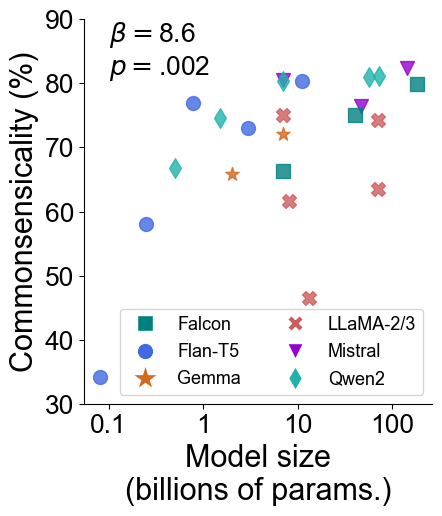

In [41]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, 1, figsize=(4.5, 5))


def reg(model_names, color, ax, marker):
    df = size_vs_comm[size_vs_comm.index.isin(model_names)]
    x, y = df["log_size"], df["commonsensicality"]
    #     x += np.random.uniform(0, 1, x.shape)
    sns.regplot(
        x=x,
        y=y,
        color=color,
        ax=ax,
        ci=None,
        scatter_kws={"s": 100},
        marker=marker,
        line_kws={"linewidth": 2, "alpha": 0.9},
        fit_reg=False,
    )


reg(
    ax=ax,
    model_names=[
        "LLaMA-2-7B",
        "LLaMA-2-13B",
        "LLaMA-2-70B",
        "LLaMA-3-8B",
        "LLaMA-3-70B",
    ],
    color="indianred",
    marker="X",
)

# reg(ax=ax, model_names=["LLaMA-3-8B", "LLaMA-3-70B"],
#         color="indianred")

reg(
    ax=ax,
    model_names=[
        "Flan-T5-Small",
        "Flan-T5-Base",
        "Flan-T5-Large",
        "Flan-T5-XL",
        "Flan-T5-XXL",
    ],
    color="royalblue",
    marker="o",
)

reg(ax=ax, model_names=["Gemma-2B", "Gemma-7B"], color="chocolate", marker="*")

reg(
    ax=ax,
    model_names=["Mistral-7B", "Mixtral-8x7B", "Mixtral-8x22B"],
    color="darkviolet",
    marker="v",
)

reg(
    ax=ax,
    model_names=["Falcon-7B", "Falcon-40B", "Falcon-180B"],
    color="teal",
    marker="s",
)

reg(
    ax=ax,
    model_names=["Qwen2-0.5B", "Qwen2-1.5B", "Qwen2-7B", "Qwen2-57B", "Qwen2-72B"],
    color="lightseagreen",
    marker="d",
)

# reg(ax=ax, model_names=["DBRX"],
#         color="crimson")

ax.set_xlabel("Model size\n(billions of params.)", size=22)
ax.set_ylabel("Commonsensicality (%)", size=22)

ax.set_xticks(
    [-1, 0, 1, 2],
    [
        "0.1",
        "1",
        "10",
        "100",
    ],
    size=19,
)

labels = [f"{c:.0f}" for c in ax.get_yticks()]
ax.set_yticks(ax.get_yticks(), labels)
ax.tick_params(axis="y", which="major", labelsize=19)
sns.despine(ax=ax)

ax.set_ylim([30, 90])


legends = [
    Line2D(
        [0],
        [0],
        color="w",
        markerfacecolor="teal",
        marker="s",
        markersize=12,
        label="Falcon",
    ),
    Line2D(
        [0],
        [0],
        color="w",
        markerfacecolor="royalblue",
        marker="o",
        markersize=12,
        label="Flan-T5",
    ),
    Line2D(
        [0],
        [0],
        color="w",
        markerfacecolor="chocolate",
        marker="*",
        markersize=20,
        label="Gemma",
    ),
    Line2D(
        [0],
        [0],
        color="w",
        markerfacecolor="indianred",
        marker="X",
        markersize=12,
        label="LLaMA-2/3",
    ),
    Line2D(
        [0],
        [0],
        color="w",
        markerfacecolor="darkviolet",
        marker="v",
        markersize=12,
        label="Mistral",
    ),
    Line2D(
        [0],
        [0],
        color="w",
        markerfacecolor="lightseagreen",
        marker="d",
        markersize=12,
        label="Qwen2",
    ),
]
leg = ax.legend(handles=legends, loc="best", ncol=2, fontsize=13, frameon=True)

# Annotate regression coefficient (see below)
ax.text(x=-1, y=85, s="$\\beta =$8.6\n$p =$.002", va="center", ha="left", size=19)

# ax.scatter(size_vs_comm["log_size"], size_vs_comm["commonsensicality"])

plt.savefig("figures/model_size_vs_commosensicality.pdf", bbox_inches="tight")

plt.show()

### Mixed-Effect Regression


In [42]:
all_models_for_regression = [
    "LLaMA-2-7B",
    "LLaMA-2-13B",
    "LLaMA-2-70B",
    "LLaMA-3-8B",
    "LLaMA-3-70B",
    "Flan-T5-Small",
    "Flan-T5-Base",
    "Flan-T5-Large",
    "Flan-T5-XL",
    "Flan-T5-XXL",
    "Gemma-2B",
    "Gemma-7B",
    "Mistral-7B",
    "Mixtral-8x7B",
    "Mixtral-8x22B",
    "Falcon-7B",
    "Falcon-40B",
    "Falcon-180B",
    "Qwen2-0.5B",
    "Qwen2-1.5B",
    "Qwen2-7B",
    "Qwen2-57B",
    "Qwen2-72B",
]

mixed_effects_df = size_vs_comm[
    size_vs_comm.index.isin(all_models_for_regression)
].copy()

for i in mixed_effects_df.index:
    group = None
    if i.startswith("LLaMA"):
        group = "LLaMA-2/3"
    elif i.startswith("Flan-T5"):
        group = "Flan-T5"
    elif i.startswith("Gemma"):
        group = "Gemma"
    elif i.startswith("Mi"):
        group = "Mistral"
    elif i.startswith("Qwen2"):
        group = "Qwen2"
    elif i.startswith("Falcon"):
        group = "Falcon"
    else:
        print(i)
    mixed_effects_df.loc[i, "model_family"] = group

In [43]:
mixed_effects_df.to_csv("./data/mixed_effect_size_vs_commonsensicality.csv")

In [44]:
!cat src/size_vs_commonsensicality.R

library(lmerTest)

data <- read.csv("data/mixed_effect_size_vs_commonsensicality.csv")

result <- lmer(commonsensicality ~ log_size + (1 | model_family), data=data)
summary(result)
confint(result)

In [45]:
!Rscript src/size_vs_commonsensicality.R

Loading required package: lme4
Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: commonsensicality ~ log_size + (1 | model_family)
   Data: data

REML criterion at convergence: 160.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.29891 -0.21910 -0.04531  0.62429  1.52934 

Random effects:
 Groups       Name        Variance Std.Dev.
 model_family (Intercept) 22.72    4.767   
 Residual                 80.02    8.945   
Number of obs: 23, groups:  model_family, 6

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   62.908      3.592  9.421  17.513 1.66e-08 ***
log_size       8.576      2.456 20.444   3.492  0.00224 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation

## Relationship between Model Elo Score (on LMSYS Arena) and Commonsensicality


In [46]:
arena_vs_comm = pd.DataFrame()
arena_vs_comm["commonsensicality"] = all_con_awe_com["commonsensicality"] * 100

In [47]:
# # July 8, 2024 version
# arena_vs_comm.loc["GPT-4o", "score"] = 1287
# arena_vs_comm.loc["GPT-4-0409", "score"] = 1257
# arena_vs_comm.loc["GPT-4-0125", "score"] = 1246
# arena_vs_comm.loc["GPT-3.5", "score"] = 1105

# arena_vs_comm.loc["LLaMA-3-8B", "score"] = 1152
# arena_vs_comm.loc["LLaMA-3-70B", "score"] = 1207

# arena_vs_comm.loc["LLaMA-2-7B", "score"] = 1037
# arena_vs_comm.loc["LLaMA-2-13B", "score"] = 1063
# arena_vs_comm.loc["LLaMA-2-70B", "score"] = 1093

# arena_vs_comm.loc["Gemma-2B", "score"] = 989
# arena_vs_comm.loc["Gemma-7B", "score"] = 1084
# arena_vs_comm.loc["Gemini Pro 1.0", "score"] = 1209

# arena_vs_comm.loc["Mistral-7B", "score"] = 1072
# arena_vs_comm.loc["Mixtral-8x7B", "score"] = 1114
# arena_vs_comm.loc["Mixtral-8x22B", "score"] = 1146
# arena_vs_comm.loc["Mistral-Large", "score"] = 1157

# arena_vs_comm.loc["Claude 3 Opus", "score"] = 1248
# arena_vs_comm.loc["Claude 3 Sonnet", "score"] = 1201
# arena_vs_comm.loc["Claude 3 Haiku", "score"] = 1179

# arena_vs_comm.loc["OLMo-7B", "score"] = 1015

# arena_vs_comm.loc["Qwen2-72B", "score"] = 1188

# # arena_vs_comm.loc["Falcon-40B", "score"] =
# arena_vs_comm.loc["Falcon-180B", "score"] = 1034

# arena_vs_comm.loc["DBRX", "score"] = 1103

In [48]:
# August 16, 2025 version
# Using 3,866,847 votes
arena_vs_comm.loc["GPT-5", "score"] = 1461
arena_vs_comm.loc["GPT-4o", "score"] = 1441
arena_vs_comm.loc["GPT-4-0409", "score"] = 1324
arena_vs_comm.loc["GPT-4-0125", "score"] = 1314
arena_vs_comm.loc["GPT-3.5", "score"] = 1224

arena_vs_comm.loc["LLaMA-3-8B", "score"] = 1225
arena_vs_comm.loc["LLaMA-3-70B", "score"] = 1276

arena_vs_comm.loc["LLaMA-2-7B", "score"] = 1113
arena_vs_comm.loc["LLaMA-2-13B", "score"] = 1147
arena_vs_comm.loc["LLaMA-2-70B", "score"] = 1175

arena_vs_comm.loc["Gemma-2B", "score"] = 1093
arena_vs_comm.loc["Gemma-7B", "score"] = 1136
arena_vs_comm.loc["Gemini Pro 1.0", "score"] = 1221

arena_vs_comm.loc["Mistral-7B", "score"] = 1155
arena_vs_comm.loc["Mixtral-8x7B", "score"] = 1201
arena_vs_comm.loc["Mixtral-8x22B", "score"] = 1232
# mistral-large-2402, because this model was used
# in our data collection in May 2024
arena_vs_comm.loc["Mistral-Large", "score"] = 1244

arena_vs_comm.loc["Claude 3 Opus", "score"] = 1322
arena_vs_comm.loc["Claude 3 Sonnet", "score"] = 1282
arena_vs_comm.loc["Claude 3 Haiku", "score"] = 1262

arena_vs_comm.loc["OLMo-7B", "score"] = 1080

arena_vs_comm.loc["Qwen2-72B", "score"] = 1264

# arena_vs_comm.loc["Falcon-40B", "score"] =
arena_vs_comm.loc["Falcon-180B", "score"] = 1148

arena_vs_comm.loc["DBRX", "score"] = 1198

In [49]:
def arena_score_to_winning_rate(x):
    p = 1 / (1 + 10 ** ((1224 - x) / 400))
    return p / (1 - p)


arena_score_to_winning_rate(1461)

arena_vs_comm["score_ratio_with_gpt3"] = arena_vs_comm["score"].apply(
    arena_score_to_winning_rate
)

In [50]:
arena_vs_comm.sort_index()

,commonsensicality,score,score_ratio_with_gpt3
Claude 3 Haiku,61.401182,1262.0,1.244515
Claude 3 Opus,75.399023,1322.0,1.757924
Claude 3 Sonnet,61.546644,1282.0,1.396368
DBRX,76.287711,1198.0,0.860994
Falcon-180B,79.917867,1148.0,0.645654
Falcon-40B,75.054790,NaN,NaN
Falcon-7B,66.337294,NaN,NaN
Flan-T5-Base,58.130977,NaN,NaN
Flan-T5-Large,76.899529,NaN,NaN
Flan-T5-Small,34.172153,NaN,NaN


In [51]:
arena_vs_comm.sort_values("commonsensicality", ascending=False)

,commonsensicality,score,score_ratio_with_gpt3
Mixtral-8x22B,82.341631,1232.0,1.047129
Mistral-Large,81.274964,1244.0,1.122018
Qwen2-72B,81.141322,1264.0,1.258925
Qwen2-57B,80.915320,NaN,NaN
GPT-4-0409,80.578014,1324.0,1.778279
Mistral-7B,80.439748,1155.0,0.672202
Flan-T5-XXL,80.404551,NaN,NaN
Qwen2-7B,80.369057,NaN,NaN
Falcon-180B,79.917867,1148.0,0.645654
Gemini Pro 1.0,79.724768,1221.0,0.982879


In [52]:
# Remove all models whose sizes we don't know
arena_vs_comm = arena_vs_comm.dropna(subset=["score"])
arena_vs_comm.shape

(24, 3)

0.21583358541869496 ConfidenceInterval(low=np.float64(-0.2054510392075328), high=np.float64(0.5696342054686536))


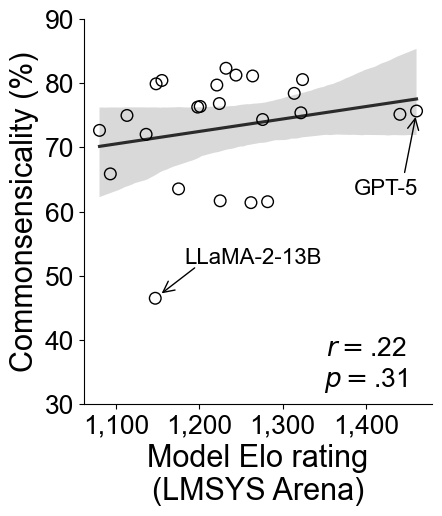

In [53]:
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(4.5, 5))

sns.regplot(
    x=arena_vs_comm["score"],
    y=arena_vs_comm["commonsensicality"],
    ax=ax,
    ci=95,
    n_boot=1000,
    color="black",
    scatter_kws=dict(alpha=1, facecolor="none", s=70),
    line_kws=dict(alpha=0.8),
)

sns.despine(ax=ax)

ax.set_yticks([30, 40, 50, 60, 70, 80, 90])
ax.set_xticks([1100, 1200, 1300, 1400], ["1,100", "1,200", "1,300", "1,400"], size=17)
labels = [f"{c:.0f}" for c in ax.get_yticks()]
ax.set_yticks(ax.get_yticks(), labels)
ax.tick_params(axis="y", which="major", labelsize=19)
ax.tick_params(axis="x", which="major", labelsize=19)

ax.set_xlabel("Model Elo rating\n(LMSYS Arena)", size=22)
ax.set_ylabel("Commonsensicality (%)", size=22)

result = pearsonr(
    x=arena_vs_comm["score"],
    y=arena_vs_comm["commonsensicality"],
    alternative="two-sided",
)

print(result.statistic, result.confidence_interval(0.95))

r = f"{result.statistic:.2f}"[1:]
p = f"{result.pvalue:.2f}"[1:]

ax.text(x=1400, y=36, s=f"$r=${r}\n$p=${p}", va="center", ha="center", size=19)

y = arena_vs_comm.loc["GPT-5", "commonsensicality"]
x = arena_vs_comm.loc["GPT-5", "score"]
arr = mpatches.FancyArrowPatch(
    (x - 15, y - 10),
    (x - 0.5, y - 0.5),
    arrowstyle="->,head_width=.2",
    mutation_scale=20,
    color="black",
)
ax.add_patch(arr)
ax.annotate(
    f"GPT-5", (1, -0.3), xycoords=arr, ha="right", va="center", size=16, color="black"
)

y = arena_vs_comm.loc["LLaMA-2-13B", "commonsensicality"]
x = arena_vs_comm.loc["LLaMA-2-13B", "score"]
arr = mpatches.FancyArrowPatch(
    (x + 50, y + 5),
    (x + 5, y + 0.5),
    arrowstyle="->,head_width=.2",
    mutation_scale=20,
    color="black",
)
ax.add_patch(arr)
ax.annotate(
    f"LLaMA-2-13B",
    (5, 1.4),
    xycoords=arr,
    ha="right",
    va="center",
    size=16,
    color="black",
)


plt.savefig("figures/model_elo_rating_vs_commosensicality.pdf", bbox_inches="tight")
plt.show()

In [54]:
result.confidence_interval()

ConfidenceInterval(low=np.float64(-0.2054510392075328), high=np.float64(0.5696342054686536))

## Relationship between OpenBookQA Performance and Commonsensicality


In [55]:
openbook_vs_comm = pd.DataFrame()
openbook_vs_comm["commonsensicality"] = all_con_awe_com["commonsensicality"] * 100

In [56]:
# V 1.13.9 (2025-01-10) on HELM Lite
# https://crfm.stanford.edu/helm/lite/v1.13.0/
openbook_vs_comm.loc["GPT-4o", "score"] = 96.6
openbook_vs_comm.loc["GPT-4-0409", "score"] = 97.0
openbook_vs_comm.loc["GPT-3.5", "score"] = 83.8

openbook_vs_comm.loc["LLaMA-3-8B", "score"] = 76.6
openbook_vs_comm.loc["LLaMA-3-70B", "score"] = 93.4

openbook_vs_comm.loc["LLaMA-2-7B", "score"] = 54.4
openbook_vs_comm.loc["LLaMA-2-13B", "score"] = 63.4
openbook_vs_comm.loc["LLaMA-2-70B", "score"] = 83.8

openbook_vs_comm.loc["Gemma-7B", "score"] = 80.8
openbook_vs_comm.loc["Gemini Pro 1.0", "score"] = 78.8

openbook_vs_comm.loc["Mistral-7B", "score"] = 77.6
openbook_vs_comm.loc["Mixtral-8x7B", "score"] = 86.8
openbook_vs_comm.loc["Mixtral-8x22B", "score"] = 88.2
openbook_vs_comm.loc["Mistral-Large", "score"] = 89.4

openbook_vs_comm.loc["Claude 3 Opus", "score"] = 95.6
openbook_vs_comm.loc["Claude 3 Sonnet", "score"] = 91.8
openbook_vs_comm.loc["Claude 3 Haiku", "score"] = 85.4

openbook_vs_comm.loc["OLMo-7B", "score"] = 22.2

openbook_vs_comm.loc["Qwen2-72B", "score"] = 95.4

openbook_vs_comm.loc["Falcon-7B", "score"] = 26.0
openbook_vs_comm.loc["Falcon-40B", "score"] = 66.2

openbook_vs_comm.loc["DBRX", "score"] = 91.0

In [57]:
# Remove all models whose score we don't know
openbook_vs_comm = openbook_vs_comm.dropna(subset=["score"])
openbook_vs_comm.sort_values("score")

,commonsensicality,score
OLMo-7B,72.661463,22.2
Falcon-7B,66.337294,26.0
LLaMA-2-7B,74.987681,54.4
LLaMA-2-13B,46.496739,63.4
Falcon-40B,75.054790,66.2
LLaMA-3-8B,61.684388,76.6
Mistral-7B,80.439748,77.6
Gemini Pro 1.0,79.724768,78.8
Gemma-7B,72.046708,80.8
GPT-3.5,76.842126,83.8


0.2765777871948773 ConfidenceInterval(low=np.float64(-0.16417466167513103), high=np.float64(0.6252745163321594))


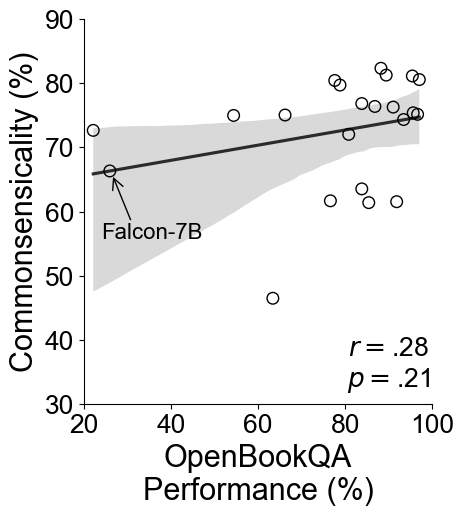

In [58]:
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(4.5, 5))

sns.regplot(
    x=openbook_vs_comm["score"],
    y=openbook_vs_comm["commonsensicality"],
    ax=ax,
    ci=95,
    n_boot=1000,
    color="black",
    scatter_kws=dict(alpha=1, facecolor="none", s=70),
    line_kws=dict(alpha=0.8),
)

sns.despine(ax=ax)

ax.set_yticks([30, 40, 50, 60, 70, 80, 90])
ax.set_xticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], size=17)
ax.set_xlim([20, 100])
labels = [f"{c:.0f}" for c in ax.get_yticks()]

ax.set_yticks(ax.get_yticks(), labels)
ax.tick_params(axis="y", which="major", labelsize=19)
ax.tick_params(axis="x", which="major", labelsize=19)

ax.set_xlabel("OpenBookQA\nPerformance (%)", size=22)
ax.set_ylabel("Commonsensicality (%)", size=22)

result = pearsonr(
    x=openbook_vs_comm["score"],
    y=openbook_vs_comm["commonsensicality"],
    alternative="two-sided",
)

print(result.statistic, result.confidence_interval(0.95))

r = f"{result.statistic:.2f}"[1:]
p = f"{result.pvalue:.2f}"[1:]

ax.text(x=90, y=36, s=f"$r=${r}\n$p=${p}", va="center", ha="center", size=19)

y = openbook_vs_comm.loc["Falcon-7B", "commonsensicality"]
x = openbook_vs_comm.loc["Falcon-7B", "score"]
arr = mpatches.FancyArrowPatch(
    (x + 5, y - 8),
    (x + 0.5, y - 0.5),
    arrowstyle="->,head_width=.2",
    mutation_scale=20,
    color="black",
)
ax.add_patch(arr)
ax.annotate(
    f"Falcon-7B",
    (5, -0.3),
    xycoords=arr,
    ha="right",
    va="center",
    size=16,
    color="black",
)

plt.savefig("figures/model_openbook_qa_vs_commonsensicality.pdf", bbox_inches="tight")
plt.show()

## Comparing Models with Humans on Individual-Level Commonsensicality


### Binarize model's answers


In [59]:
statements = pd.read_csv("data/statements_and_prompts.csv")
statements = statements.iloc[:, :-3]

# Human votes
statements["human_q1"] = avg_vote_per_q

for q in ["q1", "q2"]:
    for model_name, qs in all_models.items():
        answers = qs[q].iloc[:, :-1]
        answers = answers.div(answers.sum(axis=1), axis=0)
        statements[model_name + "_" + q] = answers["yes"]

# statements.to_csv("data/results/all_models.csv")

for col in statements.columns:
    if col.endswith("_q1") or col.endswith("_q2"):
        statements[col] = (statements[col] >= 0.5).astype(int)

statements.to_csv("data/results/all_models_binarythresh.csv")

In [60]:
answers_all_models = pd.read_csv(
    "data/results/all_models_binarythresh.csv", index_col=0
)

### Compare humans with models


When compared a model X with a person Y, restrict our calculation of model commonsensicality score to only the statements that were labeled by person Y.


In [61]:
def model_wrt_individual_human_comm(model_name, participant_id):
    # Only use questions that have been answered by this person
    ind_ratings = individual[str(participant_id)]
    ind_ratings = ind_ratings.dropna().astype(int)

    human = answers_all_models["human_q1"][ind_ratings.index]

    model_q1 = answers_all_models[model_name + "_q1"][ind_ratings.index]
    model_q2 = answers_all_models[model_name + "_q2"][ind_ratings.index]

    consensus = accuracy_score(y_true=human, y_pred=model_q1)
    awareness = accuracy_score(y_true=human, y_pred=model_q2)
    c = np.sqrt(consensus * awareness)

    return c

In [62]:
model_vs_human_commonsensicality = {}
for model_name in all_model_comm.keys():
    model_vs_human_commonsensicality[model_name] = np.zeros(
        individual.shape[1], dtype=float
    )
    for participant_id in tqdm(
        range(individual.shape[1]),
        leave=False,
    ):
        val = model_wrt_individual_human_comm(model_name, participant_id)
        model_vs_human_commonsensicality[model_name][participant_id] = val

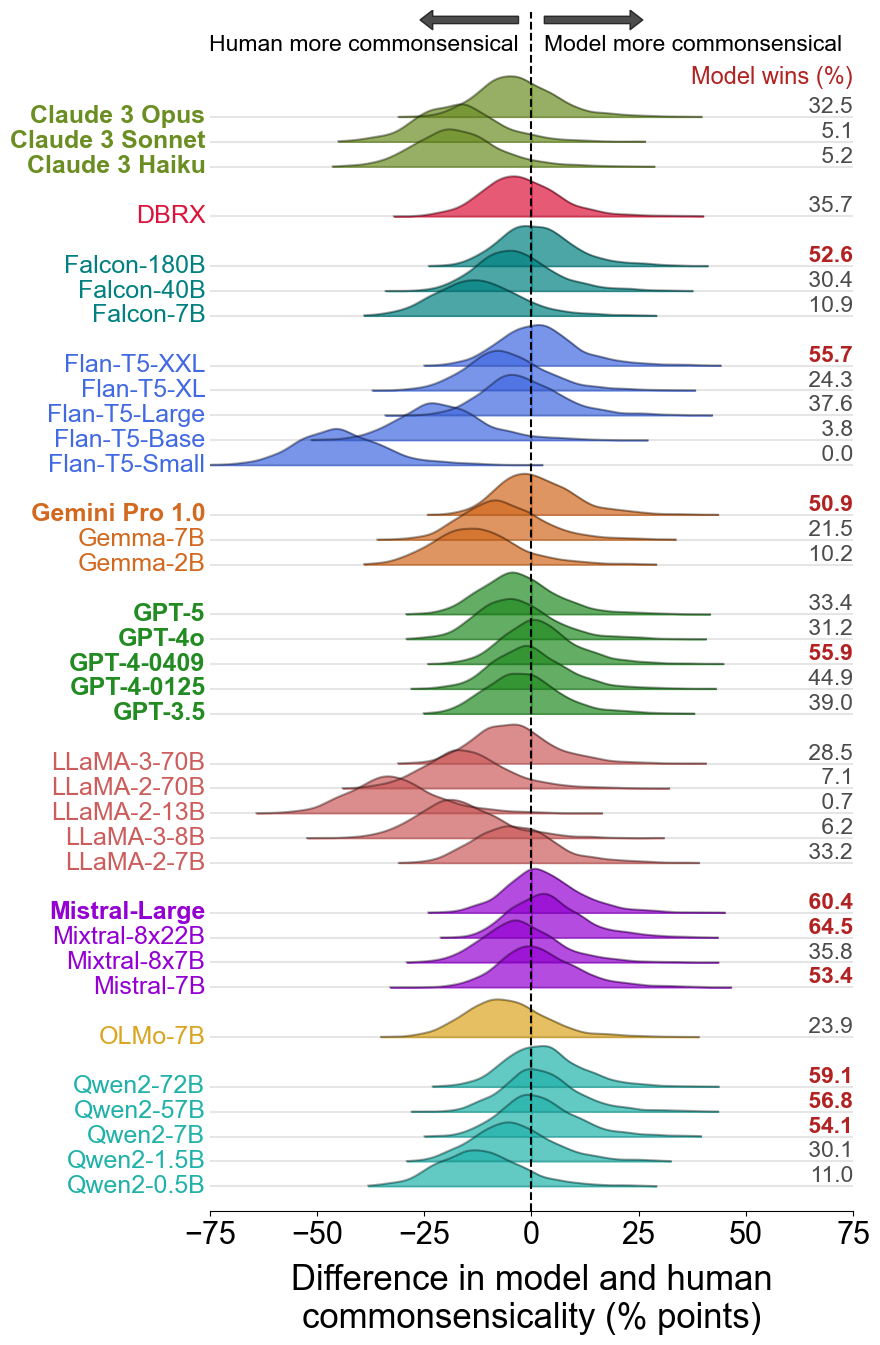

In [63]:
from scipy import stats
from matplotlib.colors import to_rgb

fig, ax = plt.subplots(1, 1, figsize=(8.3, 15.6))

yticks_val = []
yticks = []


def ax_scatter(ax, model_names, color, yticks_val, yticks):
    max_yticksval = max(yticks_val) if len(yticks_val) > 0 else 0
    yvals = np.array(
        list(range(max_yticksval + 1, max_yticksval + len(model_names) + 1))
    )

    for yval, model_name in zip(yvals[::-1], model_names[::-1]):
        diff = model_vs_human_commonsensicality[model_name] - M_j
        diff *= 100

        yval_rand = np.repeat(yval, len(diff)).astype(float)
        yval_rand += np.random.normal(0, 0.06, yval_rand.shape[0])

        kde = stats.gaussian_kde(diff)
        xx = np.linspace(diff.min(), diff.max(), 1000)
        xx_left = xx[xx < 0]
        xx_right = xx[xx >= 0]
        ax.fill_between(
            xx_left,
            y1=kde(xx_left) * 35 + yval,
            y2=yval,
            color=color,
            alpha=0.7,
            edgecolor=tuple(list(to_rgb(color)) + [1]),
        )
        ax.fill_between(
            xx_right,
            y1=kde(xx_right) * 35 + yval,
            y2=yval,
            color=color,
            alpha=0.7,
            edgecolor=tuple(list(to_rgb(color)) + [1]),
        )
        ax.plot(xx, kde(xx) * 35 + yval, color="k", alpha=0.35)
        ax.plot([-100, 100], [yval, yval], color="k", alpha=0.1)

        if model_name in [
            "GPT-5",
            "GPT-4-0409",
            "GPT-4-0125",
            "GPT-4o",
            "GPT-3.5",
            "Claude 3 Haiku",
            "Claude 3 Sonnet",
            "Claude 3 Opus",
            "Mistral-Large",
            "Gemini Pro 1.0",
        ]:
            bold = True
        else:
            bold = False
        ax.text(
            x=-76,
            y=yval,
            s=model_name,
            size=18,
            ha="right",
            color=color,
            va="center",
            fontweight="bold" if bold else None,
        )

        model_win_rate = (diff > 0).mean()
        if model_win_rate > 0.5:
            ax.text(
                x=75,
                y=yval,
                s=f"{(diff > 0).mean() * 100: .1f}",
                size=16.5,
                ha="right",
                color="firebrick",
                va="bottom",
                fontweight="bold",
            )
        else:
            ax.text(
                x=75,
                y=yval,
                s=f"{(diff > 0).mean() * 100: .1f}",
                size=16.5,
                ha="right",
                color="k",
                va="bottom",
                alpha=0.7,
            )

    yticks_val.extend(yvals)
    yticks.extend(model_names)
    yticks_val.append(max(yticks_val) + 1)
    yticks.append("")


ax_scatter(
    ax=ax,
    model_names=["Qwen2-0.5B", "Qwen2-1.5B", "Qwen2-7B", "Qwen2-57B", "Qwen2-72B"],
    color="lightseagreen",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_scatter(
    ax=ax,
    model_names=["OLMo-7B"],
    color="goldenrod",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_scatter(
    ax=ax,
    model_names=["Mistral-7B", "Mixtral-8x7B", "Mixtral-8x22B", "Mistral-Large"],
    color="darkviolet",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_scatter(
    ax=ax,
    model_names=[
        "LLaMA-2-7B",
        "LLaMA-3-8B",
        "LLaMA-2-13B",
        "LLaMA-2-70B",
        "LLaMA-3-70B",
    ],
    color="indianred",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_scatter(
    ax=ax,
    model_names=["GPT-3.5", "GPT-4-0125", "GPT-4-0409", "GPT-4o", "GPT-5"],
    color="forestgreen",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_scatter(
    ax=ax,
    model_names=["Gemma-2B", "Gemma-7B", "Gemini Pro 1.0"],
    color="chocolate",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_scatter(
    ax=ax,
    model_names=[
        "Flan-T5-Small",
        "Flan-T5-Base",
        "Flan-T5-Large",
        "Flan-T5-XL",
        "Flan-T5-XXL",
    ],
    color="royalblue",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_scatter(
    ax=ax,
    model_names=["Falcon-7B", "Falcon-40B", "Falcon-180B"],
    color="teal",
    yticks_val=yticks_val,
    yticks=yticks,
)

ax_scatter(
    ax=ax, model_names=["DBRX"], color="crimson", yticks_val=yticks_val, yticks=yticks
)


ax_scatter(
    ax=ax,
    model_names=["Claude 3 Haiku", "Claude 3 Sonnet", "Claude 3 Opus"],
    color="olivedrab",
    yticks_val=yticks_val,
    yticks=yticks,
)

# ax.set_yticks(yticks_val, yticks, size=15, va="center", ha="right")
# ax.tick_params(axis="y", length=0)
ax.set_yticks([])
ax.tick_params(axis="x", which="major", labelsize=22)


ax.plot([0, 0], [0, 48.2], color="k", linestyle="--")
ax.set_ylim(0, 48.3)
ax.set_xlim(-75, 75)

ax.text(x=3, y=46.9, s="Model more commonsensical", size=16.5, va="center", ha="left")
ax.arrow(
    x=3,
    y=47.9,
    dx=20,
    dy=0,
    width=0.3,
    head_width=0.8,
    head_length=3,
    shape="full",
    color="k",
    alpha=0.7,
)

ax.text(x=-3, y=46.9, s="Human more commonsensical", size=16.5, va="center", ha="right")
ax.arrow(
    x=-3,
    y=47.9,
    dx=-20,
    dy=0,
    width=0.3,
    head_width=0.8,
    head_length=3,
    shape="full",
    color="k",
    alpha=0.7,
)

sns.despine(ax=ax, left=True)

ax.set_xlabel(
    "Difference in model and human\ncommonsensicality (% points)", size=25, labelpad=10
)

ax.text(
    x=75,
    y=45.6,
    s="Model wins (%)",
    ha="right",
    va="center",
    size=17,
    color="firebrick",
)

plt.savefig(
    "figures/commonsensicality_model_vs_humans_ridge_1col.pdf", bbox_inches="tight"
)

plt.show()

### Rank all models based on win rate


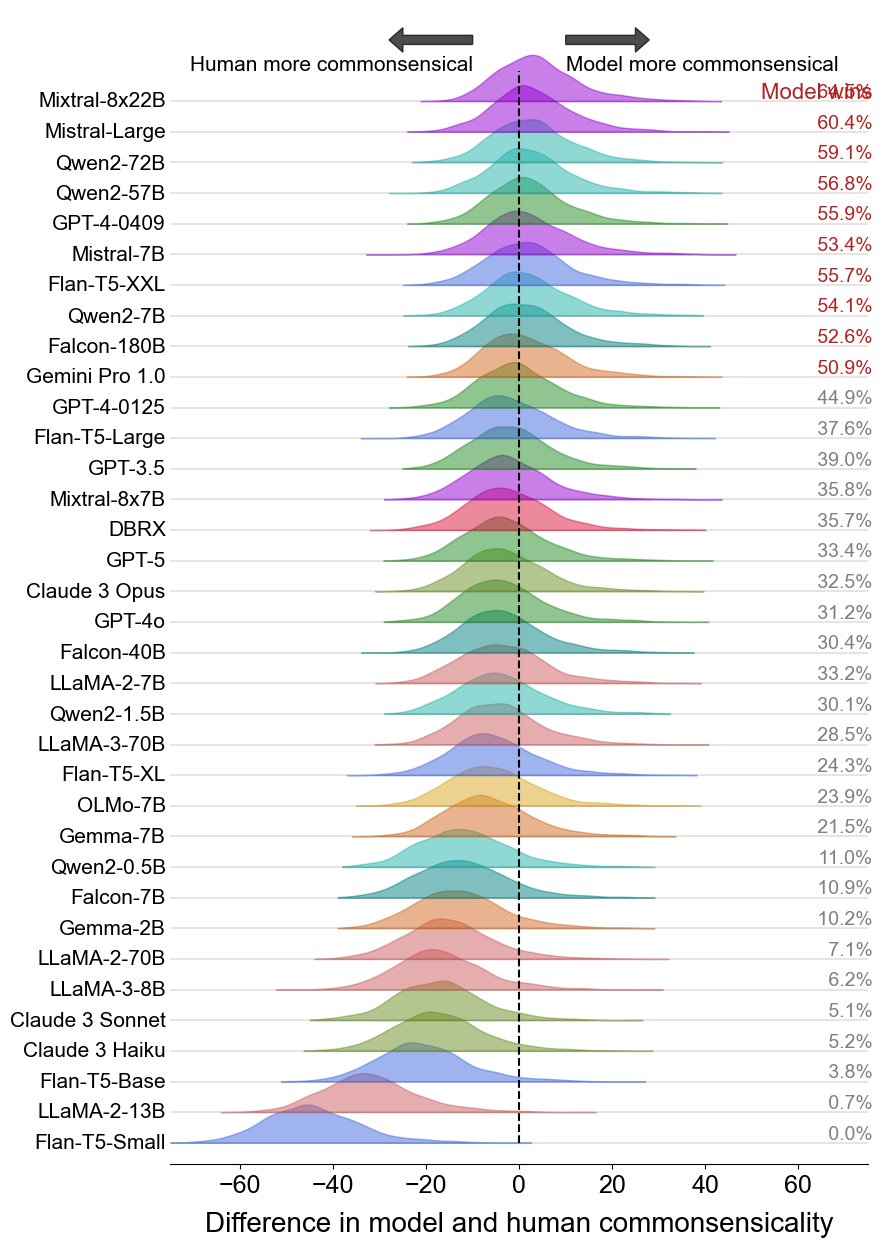

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(9, 15))

for yval, model_name in enumerate(model_order):
    diff = model_vs_human_commonsensicality[model_name] - M_j
    diff *= 100

    yval_rand = np.repeat(yval, len(diff)).astype(float)
    yval_rand += np.random.normal(0, 0.06, yval_rand.shape[0])
    kde = stats.gaussian_kde(diff)
    xx = np.linspace(diff.min(), diff.max(), 1000)

    ax.fill_between(
        xx, y1=kde(xx) * 30 + yval, y2=yval, color=model_to_color[model_name], alpha=0.5
    )
    ax.plot([-100, 100], [yval, yval], color="k", alpha=0.1)

    ax.text(x=-76, y=yval, s=model_name, size=15, ha="right", color="k", va="center")
    model_win_rate = (diff > 0).mean()
    if model_win_rate > 0.5:
        ax.text(
            x=76,
            y=yval,
            s=f"{(diff > 0).mean() * 100: .1f}%",
            size=14,
            ha="right",
            color="firebrick",
            va="bottom",
        )
    else:
        ax.text(
            x=76,
            y=yval,
            s=f"{(diff > 0).mean() * 100: .1f}%",
            size=14,
            ha="right",
            color="k",
            va="bottom",
            alpha=0.5,
        )

ax.plot([0, 0], [0, 35], color="k", linestyle="--")
ax.set_ylim(-0.7, 37)
ax.set_xlim(-75, 75)

ax.text(x=10, y=35.2, s="Model more commonsensical", size=15, va="center", ha="left")
ax.arrow(
    x=10,
    y=36,
    dx=15,
    dy=0,
    width=0.3,
    head_width=0.8,
    head_length=3,
    shape="full",
    color="k",
    alpha=0.7,
)

ax.text(x=-10, y=35.2, s="Human more commonsensical", size=15, va="center", ha="right")
ax.arrow(
    x=-10,
    y=36,
    dx=-15,
    dy=0,
    width=0.3,
    head_width=0.8,
    head_length=3,
    shape="full",
    color="k",
    alpha=0.7,
)

ax.set_yticks([])
ax.tick_params(axis="x", which="major", labelsize=18)
ax.set_xlabel("Difference in model and human commonsensicality", size=20, labelpad=10)

ax.text(
    x=76, y=34.3, s="Model wins", ha="right", va="center", size=16, color="firebrick"
)


sns.despine(ax=ax, left=True)

plt.savefig("figures/commonsensicality_model_vs_humans_ridge.pdf", bbox_inches="tight")
plt.show()